# Lending Club Case Study

## Data Understanding and Cleaning

In [1]:
# Importing relevant libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Suppress Warnings

import warnings
warnings.filterwarnings("ignore")

# Importing Machine Learning Libraries

import statsmodels.api as sm
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm



In [2]:
# Reading the csv file and putting it into 'df' object

df = pd.read_csv('Lending Club Data- Sidharth Choudhary - DR_Demo_Lending_Club.csv' , sep = ",", engine = "python")

In [3]:
# Let's understand the type of values in each column of our dataframe 'df'.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 28 columns):
Id                             10000 non-null int64
is_bad                         10000 non-null int64
emp_title                      9408 non-null object
emp_length                     10000 non-null object
home_ownership                 10000 non-null object
annual_inc                     9999 non-null float64
verification_status            10000 non-null object
pymnt_plan                     10000 non-null object
Notes                          6770 non-null object
purpose_cat                    10000 non-null object
purpose                        9996 non-null object
zip_code                       10000 non-null object
addr_state                     10000 non-null object
debt_to_income                 10000 non-null float64
delinq_2yrs                    9995 non-null float64
earliest_cr_line               9995 non-null object
inq_last_6mths                 9995 non-null floa

In [4]:
# Let's understand the data, how it look like.

df.head()

,Id,is_bad,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,Notes,purpose_cat,...,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code
0,1,0,Time Warner Cable,10,MORTGAGE,50000.0,not verified,n,NaN,medical,...,NaN,15.0,0.0,12087,12.1,44.0,f,0.0,1,PC4
1,2,0,Ottawa University,1,RENT,39216.0,not verified,n,Borrower added on 04/14/11 > I will be using...,debt consolidation,...,NaN,4.0,0.0,10114,64.0,5.0,f,0.0,2,PC1
2,3,0,Kennedy Wilson,4,RENT,65000.0,not verified,n,NaN,credit card,...,NaN,4.0,0.0,81,0.6,8.0,f,0.0,3,PC4
3,4,0,TOWN OF PLATTEKILL,10,MORTGAGE,57500.0,not verified,n,NaN,debt consolidation,...,NaN,6.0,0.0,10030,37.1,23.0,f,0.0,2,PC2
4,5,0,Belmont Correctional,10,MORTGAGE,50004.0,VERIFIED - income,n,"I want to consolidate my debt, pay for a vacat...",debt consolidation,...,NaN,8.0,0.0,10740,40.4,21.0,f,0.0,3,PC3


In [5]:
# Check the shape of dataframe df
df.shape

(10000, 28)

In [6]:
# Looking at all the column names
df.columns

Index(['Id', 'is_bad', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'pymnt_plan', 'Notes',
       'purpose_cat', 'purpose', 'zip_code', 'addr_state', 'debt_to_income',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code'],
      dtype='object')

In [7]:
# Lets create a copy of original data so that we can use it in future
master = df.copy()

The **target variable**, which we want to compare across the independent variables "is_bad". The strategy is to figure out  the average default rates across various independent variables and identify the  ones that affect "is_bad" the most.

In [8]:
master['is_bad'] = master['is_bad'].astype('category')
round(100*(master['is_bad'].value_counts()/len(master)),2)

0    87.05
1    12.95
Name: is_bad, dtype: float64

From above, we can see that 13% of dataset is positive and 87% is negative

In [9]:
# converting it into numeric type

master['is_bad'] = pd.to_numeric(master['is_bad'])

# Data Cleaning

Some columns have a large number of missing values, let's first fix the missing values and then check for other types of data quality problems.

In [10]:
# summarising number of missing values in each column
master.isnull().sum()

Id                                0
is_bad                            0
emp_title                       592
emp_length                        0
home_ownership                    0
annual_inc                        1
verification_status               0
pymnt_plan                        0
Notes                          3230
purpose_cat                       0
purpose                           4
zip_code                          0
addr_state                        0
debt_to_income                    0
delinq_2yrs                       5
earliest_cr_line                  5
inq_last_6mths                    5
mths_since_last_delinq         6316
mths_since_last_record         9160
open_acc                          5
pub_rec                           5
revol_bal                         0
revol_util                       26
total_acc                         5
initial_list_status               0
collections_12_mths_ex_med       32
mths_since_last_major_derog       0
policy_code                 

In [11]:
# percentage of missing values in each column

round(100*(master.isnull().sum()/len(master.index)), 2)

Id                              0.00
is_bad                          0.00
emp_title                       5.92
emp_length                      0.00
home_ownership                  0.00
annual_inc                      0.01
verification_status             0.00
pymnt_plan                      0.00
Notes                          32.30
purpose_cat                     0.00
purpose                         0.04
zip_code                        0.00
addr_state                      0.00
debt_to_income                  0.00
delinq_2yrs                     0.05
earliest_cr_line                0.05
inq_last_6mths                  0.05
mths_since_last_delinq         63.16
mths_since_last_record         91.60
open_acc                        0.05
pub_rec                         0.05
revol_bal                       0.00
revol_util                      0.26
total_acc                       0.05
initial_list_status             0.00
collections_12_mths_ex_med      0.32
mths_since_last_major_derog     0.00
p

In [12]:
# lets check the unique value in each column

for col in list(master):
    print(col)
    print(master[col].unique())

Id
[    1     2     3 ...  9998  9999 10000]
is_bad
[0 1]
emp_title
['Time Warner Cable' 'Ottawa University' 'Kennedy Wilson' ...
 'Weichert, Realtors' 'meadwestvaco' 'Rehab Alliance']
emp_length
['10' '1' '4' '6' '2' '3' '5' '8' '7' '9' 'na' '22' '11' '33']
home_ownership
['MORTGAGE' 'RENT' 'OWN' 'OTHER' 'NONE']
annual_inc
[50000. 39216. 65000. ... 66250. 47831. 70560.]
verification_status
['not verified' 'VERIFIED - income' 'VERIFIED - income source']
pymnt_plan
['n' 'y']
Notes
[nan
 "  Borrower added on 04/14/11 > I will be using this loan to pay off expenses accrued in the last six months on my credit cards, due to a combination of job transition, relocation for the job, and medical expenses from a broken tibula.  I generally overpay my monthly minimum on my debts, so I expect that this loan will be repaid sooner than 5 years.  I have a steady job working in the information technology field, I've been employed full-time in this field for over eight years, and have been with my pres

In [13]:
# Removing the columns having more than 30% missing values as it will not add any value in the prediction

missing_columns = master.columns[100*(master.isnull().sum()/len(master.index)) > 30]
print(missing_columns)

Index(['Notes', 'mths_since_last_delinq', 'mths_since_last_record'], dtype='object')


In [14]:
master.drop(['mths_since_last_record','mths_since_last_delinq','Notes'], axis=1, inplace = True)


In [15]:
# lets check the unique value again

for col in list(master):
    print(col)
    print(master[col].unique())


Id
[    1     2     3 ...  9998  9999 10000]
is_bad
[0 1]
emp_title
['Time Warner Cable' 'Ottawa University' 'Kennedy Wilson' ...
 'Weichert, Realtors' 'meadwestvaco' 'Rehab Alliance']
emp_length
['10' '1' '4' '6' '2' '3' '5' '8' '7' '9' 'na' '22' '11' '33']
home_ownership
['MORTGAGE' 'RENT' 'OWN' 'OTHER' 'NONE']
annual_inc
[50000. 39216. 65000. ... 66250. 47831. 70560.]
verification_status
['not verified' 'VERIFIED - income' 'VERIFIED - income source']
pymnt_plan
['n' 'y']
purpose_cat
['medical' 'debt consolidation' 'credit card' 'other' 'car' 'wedding'
 'other small business' 'house' 'small business' 'educational'
 'major purchase' 'home improvement' 'vacation'
 'debt consolidation small business' 'moving' 'credit card small business'
 'wedding small business' 'small business small business'
 'home improvement small business' 'major purchase small business'
 'educational small business' 'house small business' 'renewable energy'
 'moving small business' 'medical small business'
 'vaca

In [16]:
# Lets remove Id, zip_code,addr_state as it has too much unique value in it as it will not add any value in predictions

master.drop(['Id','zip_code','addr_state'], axis=1, inplace = True)

In [17]:
# lets check the unique value again

for col in list(master):
    print(col)
    print(master[col].unique())

is_bad
[0 1]
emp_title
['Time Warner Cable' 'Ottawa University' 'Kennedy Wilson' ...
 'Weichert, Realtors' 'meadwestvaco' 'Rehab Alliance']
emp_length
['10' '1' '4' '6' '2' '3' '5' '8' '7' '9' 'na' '22' '11' '33']
home_ownership
['MORTGAGE' 'RENT' 'OWN' 'OTHER' 'NONE']
annual_inc
[50000. 39216. 65000. ... 66250. 47831. 70560.]
verification_status
['not verified' 'VERIFIED - income' 'VERIFIED - income source']
pymnt_plan
['n' 'y']
purpose_cat
['medical' 'debt consolidation' 'credit card' 'other' 'car' 'wedding'
 'other small business' 'house' 'small business' 'educational'
 'major purchase' 'home improvement' 'vacation'
 'debt consolidation small business' 'moving' 'credit card small business'
 'wedding small business' 'small business small business'
 'home improvement small business' 'major purchase small business'
 'educational small business' 'house small business' 'renewable energy'
 'moving small business' 'medical small business'
 'vacation small business' 'car small business']
pu

In [18]:
# From above , we can see that collections_12_mths_ex_med has only two values 0. and nan. so lets remove it too
master = master.drop( ['collections_12_mths_ex_med'] ,axis = 1)

In [19]:
# From above, we can see that in purpose_cat small business is repeated in many unique value so lets correct all the names that are present in this column

# Defining the map function
def purpose_map(x):
    return x.map({ 
          'medical':'medical', 'debt consolidation':'debt consolidation', 'credit card':'credit card', 
          'other':'other', 'wedding':'wedding','house':'house', 'small business':'small business', 
          'educational':'educational', 'major purchase':'major purchase', 'car':'car',
          'home improvement':'home improvement', 'vacation':'vacation', 'other small business':'other',
          'debt consolidation small business':'debt consolidation', 'moving':'moving',
          'credit card small business':'credit card', 'wedding small business':'wedding',
          'small business small business':'small business', 'home improvement small business':'home improvement',
          'educational small business':'educational', 'house small business':'house',
          'renewable energy':'renewable energy', 'major purchase small business':'major purchase',
          'moving small business':'moving', 'medical small business':'medical',
          'vacation small business':'vacation', 'car small business':'car'})

# Applying the function

master['purpose_cat'] = master[['purpose_cat']].apply(purpose_map)

In [20]:
master['purpose_cat'].unique()

array(['medical', 'debt consolidation', 'credit card', 'other', 'car',
       'wedding', 'house', 'small business', 'educational',
       'major purchase', 'home improvement', 'vacation', 'moving',
       'renewable energy'], dtype=object)

In [21]:
# lets check the missing value again

round(100*(master.isnull().sum()/len(master.index)), 2)

is_bad                         0.00
emp_title                      5.92
emp_length                     0.00
home_ownership                 0.00
annual_inc                     0.01
verification_status            0.00
pymnt_plan                     0.00
purpose_cat                    0.00
purpose                        0.04
debt_to_income                 0.00
delinq_2yrs                    0.05
earliest_cr_line               0.05
inq_last_6mths                 0.05
open_acc                       0.05
pub_rec                        0.05
revol_bal                      0.00
revol_util                     0.26
total_acc                      0.05
initial_list_status            0.00
mths_since_last_major_derog    0.00
policy_code                    0.00
dtype: float64

In [22]:
# Lets check emp_title
master['emp_title'].unique()

array(['Time Warner Cable', 'Ottawa University', 'Kennedy Wilson', ...,
       'Weichert, Realtors', 'meadwestvaco', 'Rehab Alliance'],
      dtype=object)

In [23]:
#dropping null valus in employee title

master = master[~pd.isnull(master['emp_title'])]

# again calculating % missing values in column 
round(100*(master.isnull().sum()/len(master.index)), 2)

is_bad                         0.00
emp_title                      0.00
emp_length                     0.00
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
pymnt_plan                     0.00
purpose_cat                    0.00
purpose                        0.03
debt_to_income                 0.00
delinq_2yrs                    0.02
earliest_cr_line               0.02
inq_last_6mths                 0.02
open_acc                       0.02
pub_rec                        0.02
revol_bal                      0.00
revol_util                     0.21
total_acc                      0.02
initial_list_status            0.00
mths_since_last_major_derog    0.00
policy_code                    0.00
dtype: float64

In [24]:
# Lets check unique value of revol_util

master['revol_util'].unique()

array([1.210e+01, 6.400e+01, 6.000e-01, ..., 3.688e+01, 3.000e-02,
       1.006e+02])

In [25]:
#dropping null valus in revol_util 

master = master[~pd.isnull(master['revol_util'])]

# again calculating % missing values in column 
round(100*(master.isnull().sum()/len(master.index)), 2)

is_bad                         0.00
emp_title                      0.00
emp_length                     0.00
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
pymnt_plan                     0.00
purpose_cat                    0.00
purpose                        0.03
debt_to_income                 0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths                 0.00
open_acc                       0.00
pub_rec                        0.00
revol_bal                      0.00
revol_util                     0.00
total_acc                      0.00
initial_list_status            0.00
mths_since_last_major_derog    0.00
policy_code                    0.00
dtype: float64

In [26]:
#dropping null valus in purpose

master = master[~pd.isnull(master['purpose'])]

# again calculating % missing values in column 
round(100*(master.isnull().sum()/len(master.index)), 2)

is_bad                         0.0
emp_title                      0.0
emp_length                     0.0
home_ownership                 0.0
annual_inc                     0.0
verification_status            0.0
pymnt_plan                     0.0
purpose_cat                    0.0
purpose                        0.0
debt_to_income                 0.0
delinq_2yrs                    0.0
earliest_cr_line               0.0
inq_last_6mths                 0.0
open_acc                       0.0
pub_rec                        0.0
revol_bal                      0.0
revol_util                     0.0
total_acc                      0.0
initial_list_status            0.0
mths_since_last_major_derog    0.0
policy_code                    0.0
dtype: float64

In [27]:
# lets check the exact missing value

master.isnull().sum()

is_bad                         0
emp_title                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
pymnt_plan                     0
purpose_cat                    0
purpose                        0
debt_to_income                 0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc                      0
initial_list_status            0
mths_since_last_major_derog    0
policy_code                    0
dtype: int64

In [28]:
# From Above, we can see that now dataset donot have any null values. Lets check how much we have removed the data

round(100*(len(master.index)/len(df.index)),2)

93.85

In [29]:
# Lets check the datatype now

master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9385 entries, 0 to 9999
Data columns (total 21 columns):
is_bad                         9385 non-null int64
emp_title                      9385 non-null object
emp_length                     9385 non-null object
home_ownership                 9385 non-null object
annual_inc                     9385 non-null float64
verification_status            9385 non-null object
pymnt_plan                     9385 non-null object
purpose_cat                    9385 non-null object
purpose                        9385 non-null object
debt_to_income                 9385 non-null float64
delinq_2yrs                    9385 non-null float64
earliest_cr_line               9385 non-null object
inq_last_6mths                 9385 non-null float64
open_acc                       9385 non-null float64
pub_rec                        9385 non-null float64
revol_bal                      9385 non-null int64
revol_util                     9385 non-null float64
tota

In [30]:
# Employee length should be in int datatype. First lets check the unique value first

master['emp_length'].unique()

array(['10', '1', '4', '6', '2', '5', '3', '8', '7', '9', '22', '11',
       '33', 'na'], dtype=object)

In [31]:
# emp_length has na present in the dataset. Lets convert it to 0 

master['emp_length'] = master['emp_length'].apply(lambda x: 0 if x == 'na' else x)
master['emp_length'] = master['emp_length'].astype('int64')

In [32]:
# Lets check the datatype again

master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9385 entries, 0 to 9999
Data columns (total 21 columns):
is_bad                         9385 non-null int64
emp_title                      9385 non-null object
emp_length                     9385 non-null int64
home_ownership                 9385 non-null object
annual_inc                     9385 non-null float64
verification_status            9385 non-null object
pymnt_plan                     9385 non-null object
purpose_cat                    9385 non-null object
purpose                        9385 non-null object
debt_to_income                 9385 non-null float64
delinq_2yrs                    9385 non-null float64
earliest_cr_line               9385 non-null object
inq_last_6mths                 9385 non-null float64
open_acc                       9385 non-null float64
pub_rec                        9385 non-null float64
revol_bal                      9385 non-null int64
revol_util                     9385 non-null float64
total

In [33]:
# lets check the unique value again

for col in list(master):
    print(col)
    print(master[col].unique())

is_bad
[0 1]
emp_title
['Time Warner Cable' 'Ottawa University' 'Kennedy Wilson' ...
 'Weichert, Realtors' 'meadwestvaco' 'Rehab Alliance']
emp_length
[10  1  4  6  2  5  3  8  7  9 22 11 33  0]
home_ownership
['MORTGAGE' 'RENT' 'OWN' 'OTHER']
annual_inc
[50000. 39216. 65000. ... 66250. 47831. 70560.]
verification_status
['not verified' 'VERIFIED - income' 'VERIFIED - income source']
pymnt_plan
['n' 'y']
purpose_cat
['medical' 'debt consolidation' 'credit card' 'other' 'wedding' 'house'
 'small business' 'educational' 'major purchase' 'car' 'home improvement'
 'vacation' 'moving' 'renewable energy']
purpose
['Medical' 'My Debt Consolidation Loan' 'AP Personal Loan' ...
 'Updates Needed on Family owned home' 'Scottish Wedding'
 'Harnessing credit debt for a stable future.']
debt_to_income
[10.87  9.15 11.24 ... 24.74 20.91 24.13]
delinq_2yrs
[ 0.  1.  2.  4.  3.  7.  6.  5. 11.  8.]
earliest_cr_line
['12/1/92' '11/1/05' '6/1/70' '9/1/82' '10/1/99' '12/1/99' '11/1/79'
 '4/1/06' '2/1/01' 

In [34]:
# We can encode the pymnt_plan and verification_status so to convert it into numeric type
master['pymnt_plan'] = master['pymnt_plan'].map(dict({'y':1, 'n':0}))
master['verification_status'] = master['verification_status'].map(dict({'VERIFIED - income':1,'not verified':0,'VERIFIED - income source':1}))                                                 

In [35]:
master.describe()

,is_bad,emp_length,annual_inc,verification_status,pymnt_plan,debt_to_income,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,mths_since_last_major_derog
count,9385.000000,9385.000000,9385.000000,9385.000000,9385.000000,9385.000000,9385.000000,9385.000000,9385.000000,9385.000000,9.385000e+03,9385.000000,9385.000000,9385.000000
mean,0.126052,5.015557,68545.790548,0.567395,0.000213,13.439120,0.150879,1.065317,9.399254,0.058817,1.434087e+04,48.760869,22.106233,2.004262
std,0.331926,3.443487,48262.241765,0.495464,0.014597,6.733449,0.510374,1.480657,4.522052,0.249367,2.511787e+04,28.145350,11.667016,0.809802
min,0.000000,0.000000,4080.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,1.000000,1.000000
25%,0.000000,2.000000,40900.000000,0.000000,0.000000,8.260000,0.000000,0.000000,6.000000,0.000000,3.615000e+03,25.500000,13.000000,1.000000
50%,0.000000,4.000000,60000.000000,1.000000,0.000000,13.510000,0.000000,1.000000,9.000000,0.000000,8.808000e+03,49.000000,20.000000,2.000000
75%,0.000000,9.000000,82000.000000,1.000000,0.000000,18.790000,0.000000,2.000000,12.000000,0.000000,1.712500e+04,72.000000,29.000000,3.000000
max,1.000000,33.000000,900000.000000,1.000000,1.000000,29.990000,11.000000,25.000000,39.000000,3.000000,1.207359e+06,100.600000,90.000000,3.000000



## Exploratory Data Analysis

First, let's look at the overall default rate.


In [36]:
# default rate
round(np.mean(df['is_bad']), 2)

0.13

The overall default rate is about 13%.

In [37]:
# Lets define category columns and numerical columns

num_cols = ['is_bad','emp_length','annual_inc','debt_to_income',
           'delinq_2yrs','inq_last_6mths','open_acc','pub_rec',
           'revol_bal','revol_util','total_acc','mths_since_last_major_derog','pymnt_plan','verification_status']


cat_cols = [column for column in master.columns if column not in num_cols]

master[num_cols] = master[num_cols].apply(pd.to_numeric)
master[cat_cols] = master[cat_cols].apply(lambda column: column.astype("category"), axis=0)

In [38]:
### Lets Check Corelation metrics

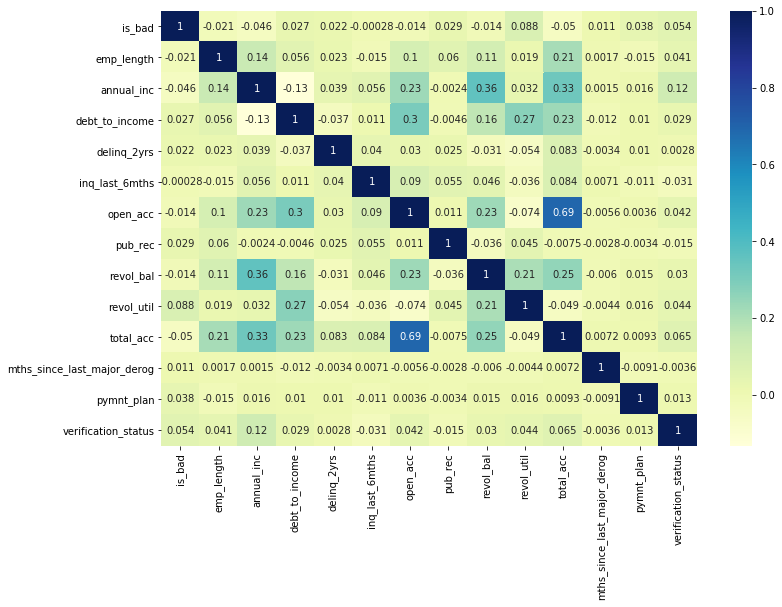

In [39]:
plt.figure(figsize=(12,8))
sns.heatmap(master[num_cols].corr(),annot=True, cmap= 'YlGnBu')
plt.show()

In [40]:
# Generating new feature % open account because open accounts and total accounts are highly correlated

master['open_acc%'] = master['open_acc']/master['total_acc']

## Univariate Analysis

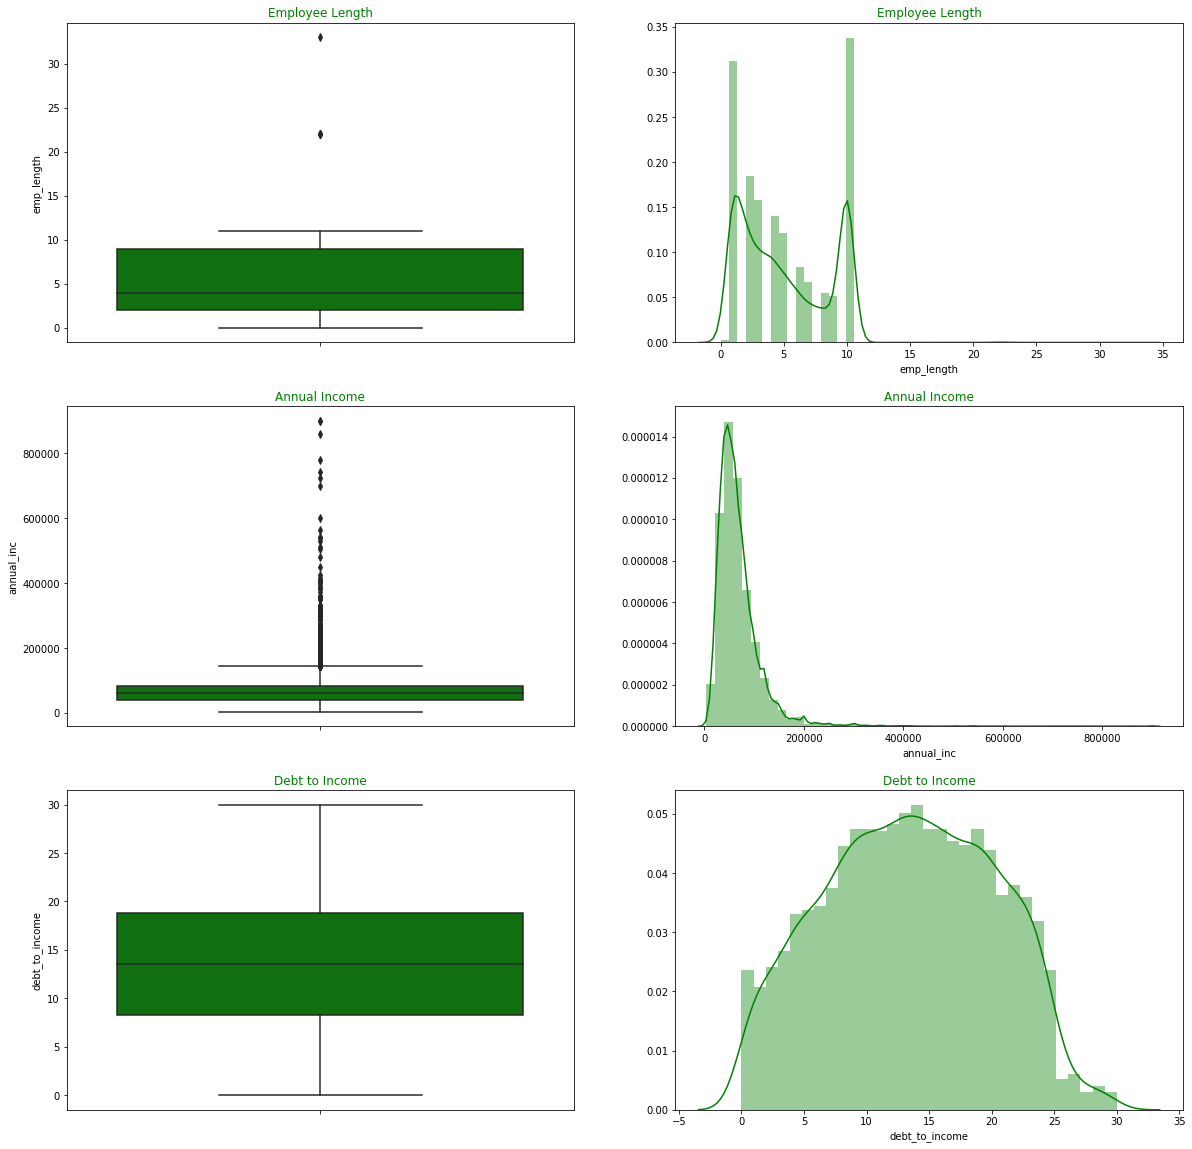

In [41]:
 # lets check emp_length, annual_inc and debt_to_income
plt.figure(figsize=(20,20))
plt.subplot(3,2,1)
sns.boxplot(y=master['emp_length'],color ='g').set_title("Employee Length",color ='g')
plt.subplot(3,2,2)
sns.distplot(master['emp_length'],color ='g').set_title("Employee Length",color ='g')

plt.subplot(3,2,3)
sns.boxplot(y=master['annual_inc'],color ='g').set_title("Annual Income",color ='g')
plt.subplot(3,2,4)
sns.distplot(master['annual_inc'],color ='g').set_title("Annual Income",color ='g')

plt.subplot(3,2,5)
sns.boxplot(y=master['debt_to_income'],color ='g').set_title("Debt to Income",color ='g')
plt.subplot(3,2,6)
sns.distplot(master['debt_to_income'],color ='g').set_title("Debt to Income",color ='g')

plt.show()

In [42]:
# From above, we can see that annual_inc contains outliers. Lets remove it by using IQR method

q25, q75 = np.percentile(master['annual_inc'], 25), np.percentile(master['annual_inc'], 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
iqr = q75 - q25
print('iqr: {}'.format(iqr))

cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

print('Cut Off: {}'.format(cut_off))
print('Lower: {}'.format(lower))
print('Upper: {}'.format(upper))

outliers = [x for x in master['annual_inc'] if x < lower or x > upper]
print('Outliers Count: {}'.format(len(outliers)))

master = master.drop(master[(master['annual_inc'] > upper) | (master['annual_inc'] < lower)].index)

Quartile 25: 40900.0 | Quartile 75: 82000.0
iqr: 41100.0
Cut Off: 61650.0
Lower: -20750.0
Upper: 143650.0
Outliers Count: 453


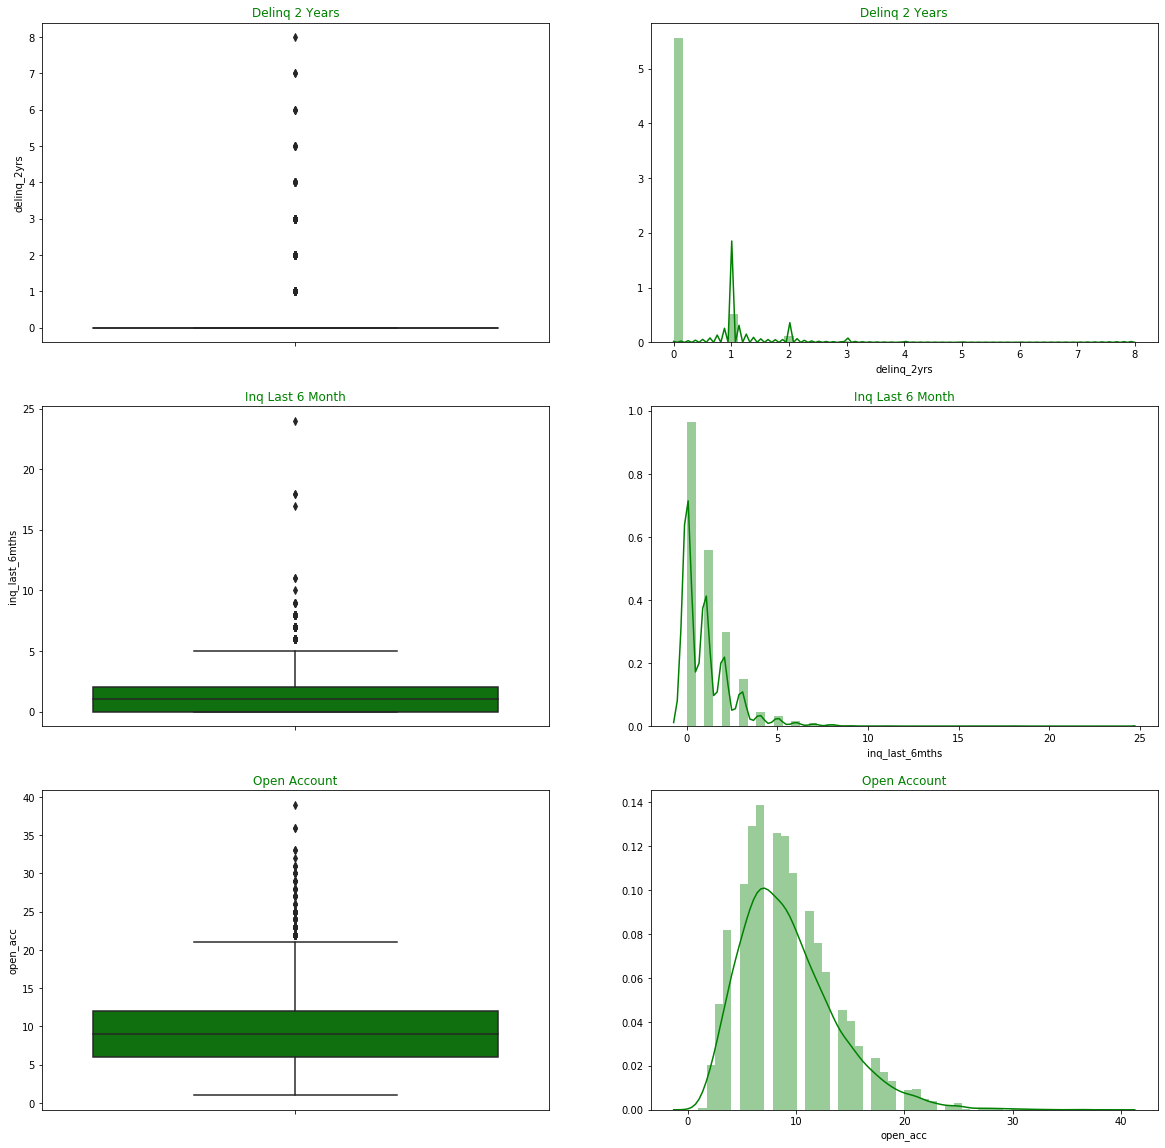

In [43]:
 # lets check delinq_2yrs, inq_last_6mths and open_acc
    
plt.figure(figsize=(20,20))

plt.subplot(3,2,1)
sns.boxplot(y=master['delinq_2yrs'],color ='g').set_title("Delinq 2 Years",color ='g')
plt.subplot(3,2,2)
sns.distplot(master['delinq_2yrs'],color ='g').set_title("Delinq 2 Years",color ='g')

plt.subplot(3,2,3)
sns.boxplot(y=master['inq_last_6mths'],color ='g').set_title("Inq Last 6 Month",color ='g')
plt.subplot(3,2,4)
sns.distplot(master['inq_last_6mths'],color ='g').set_title("Inq Last 6 Month",color ='g')

plt.subplot(3,2,5)
sns.boxplot(y=master['open_acc'],color ='g').set_title("Open Account",color ='g')
plt.subplot(3,2,6)
sns.distplot(master['open_acc'],color ='g').set_title("Open Account",color ='g')

plt.show()

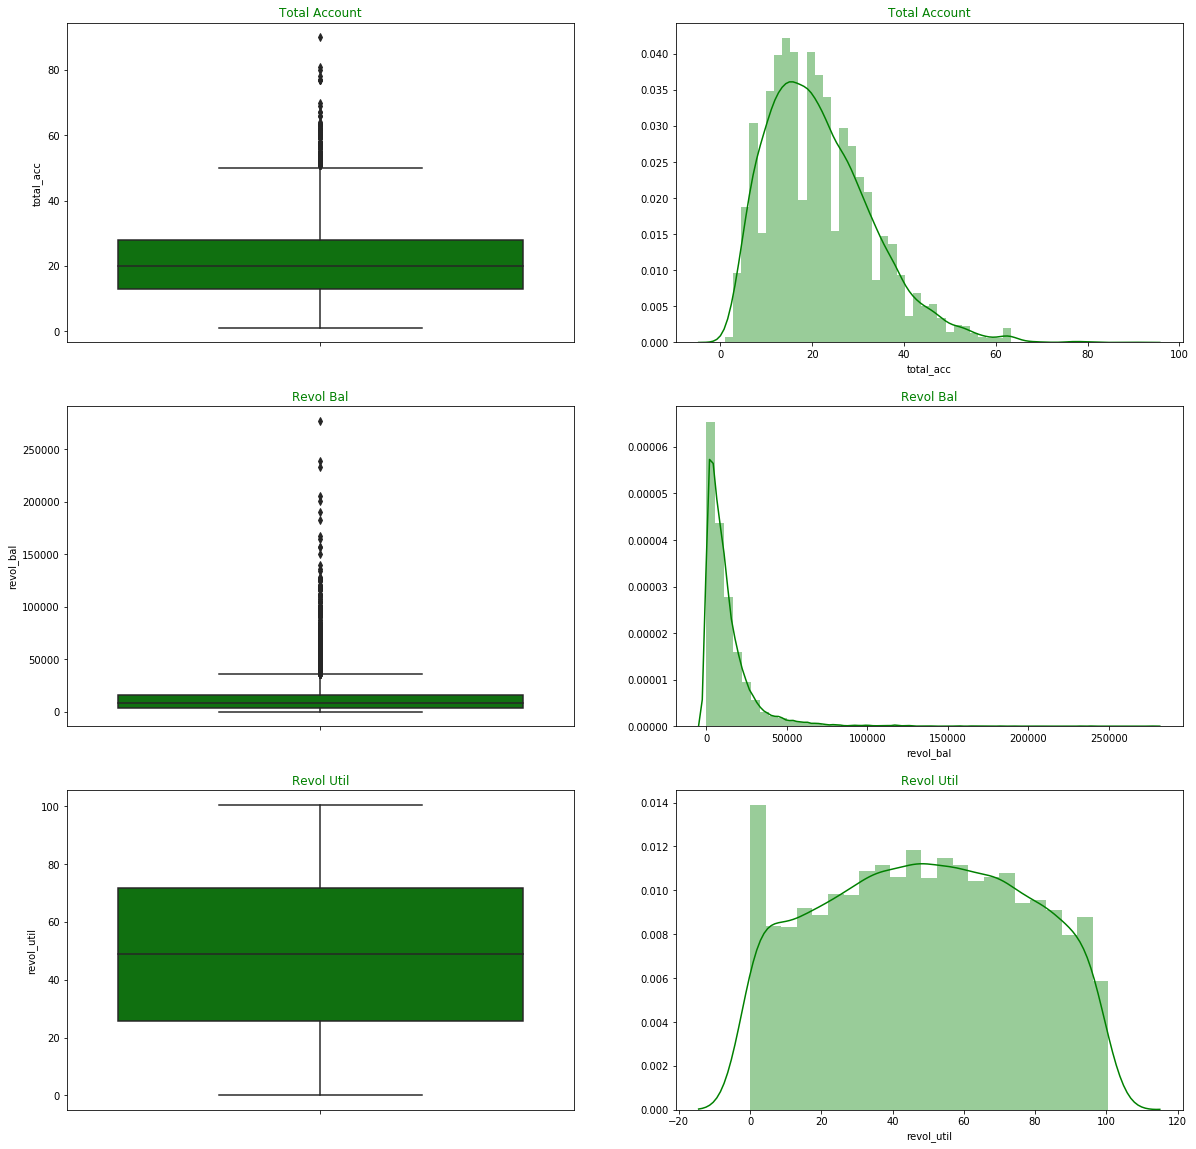

In [44]:
# lets check total_acc, revol_bal and revol_util 
    
plt.figure(figsize=(20,20))

plt.subplot(3,2,1)
sns.boxplot(y=master['total_acc'],color ='g').set_title("Total Account",color ='g')
plt.subplot(3,2,2)
sns.distplot(master['total_acc'],color ='g').set_title("Total Account",color ='g')

plt.subplot(3,2,3)
sns.boxplot(y=master['revol_bal'],color ='g').set_title("Revol Bal",color ='g')
plt.subplot(3,2,4)
sns.distplot(master['revol_bal'],color ='g').set_title("Revol Bal",color ='g')

plt.subplot(3,2,5)
sns.boxplot(y=master['revol_util'],color ='g').set_title("Revol Util",color ='g')
plt.subplot(3,2,6)
sns.distplot(master['revol_util'],color ='g').set_title("Revol Util",color ='g')

plt.show()

In [45]:
# From above, we can see that revol_bal contains outliers. Lets remove it by using IQR method

q25, q75 = np.percentile(master['revol_bal'], 25), np.percentile(master['revol_bal'], 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
iqr = q75 - q25
print('iqr: {}'.format(iqr))

cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

print('Cut Off: {}'.format(cut_off))
print('Lower: {}'.format(lower))
print('Upper: {}'.format(upper))

outliers = [x for x in master['revol_bal'] if x < lower or x > upper]
print('Outliers Count: {}'.format(len(outliers)))

master = master.drop(master[(master['revol_bal'] > upper) | (master['revol_bal'] < lower)].index)




Quartile 25: 3509.25 | Quartile 75: 16274.25
iqr: 12765.0
Cut Off: 19147.5
Lower: -15638.25
Upper: 35421.75
Outliers Count: 552


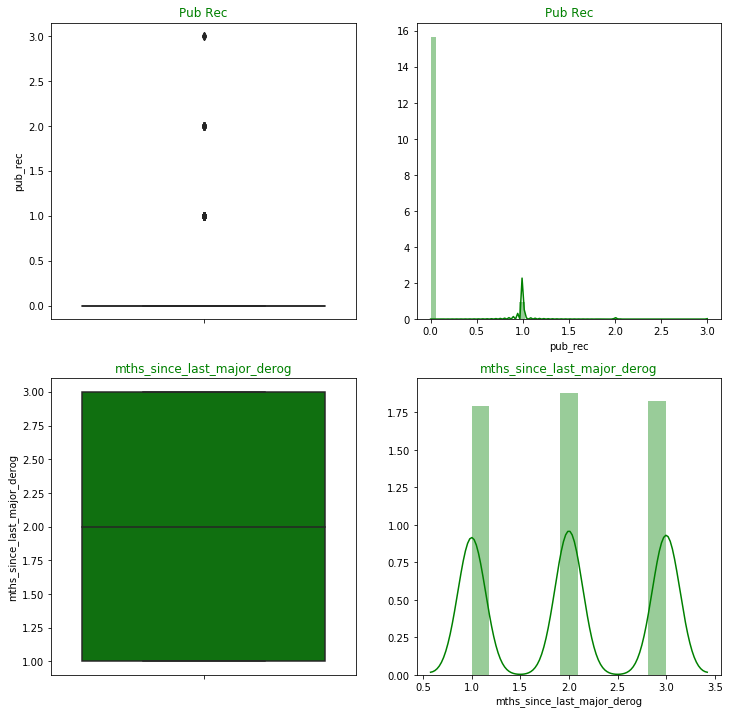

In [46]:
# lets check pub_rec, mths_since_last_major_derog
    
plt.figure(figsize=(12,12))

plt.subplot(2,2,1)
sns.boxplot(y=master['pub_rec'],color ='g').set_title("Pub Rec",color ='g')
plt.subplot(2,2,2)
sns.distplot(master['pub_rec'],color ='g').set_title("Pub Rec",color ='g')

plt.subplot(2,2,3)
sns.boxplot(y=master['mths_since_last_major_derog'],color ='g').set_title("mths_since_last_major_derog",color ='g')
plt.subplot(2,2,4)
sns.distplot(master['mths_since_last_major_derog'],color ='g').set_title("mths_since_last_major_derog",color ='g')

plt.show()

In [47]:
# The easiest way to analyse how default rates vary across continous variables is to bin the variables into discrete categories.
# Let's bin the loan amount variable into small, medium, high, very high.

# binning annual_income
def annual_income(n):
    if n < 10000:
        return 'low'
    elif n >=10000 and n < 20000:
        return 'medium'
    else:
        return 'high'
        
master['annual_inc_new'] = master['annual_inc'].apply(lambda x: annual_income(x))

# binning debt to income ratio
def dti(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=20:
        return 'medium'
    else:
        return 'high'
    
master['debt_to_income_new'] = master['debt_to_income'].apply(lambda x: dti(x))

# binning employment length

def emp_length(n):
    if n <= 1:
        return 'fresher'
    elif n > 1 and n <=3:
        return 'junior'
    elif n > 3 and n <=7:
        return 'senior'
    else:
        return 'expert'

master['emp_length_new'] = master['emp_length'].apply(lambda x: emp_length(x))



## Bivariate Analysis

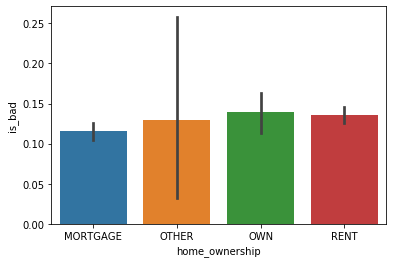

In [48]:
sns.barplot(x='home_ownership', y='is_bad', data=master)
plt.show()

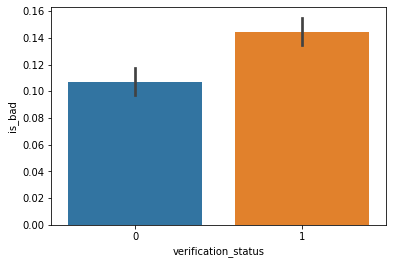

In [49]:
sns.barplot(x='verification_status', y='is_bad', data=master)
plt.show()

 From above, we can see that verified customer is showing high default rate

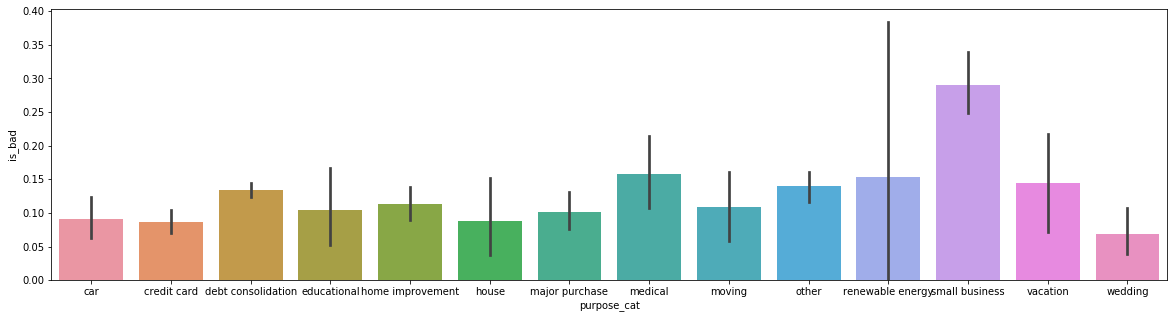

In [50]:
plt.figure(figsize=(20,5))
sns.barplot(x='purpose_cat', y='is_bad', data=master)
plt.show()

small business loans default the most, then medical

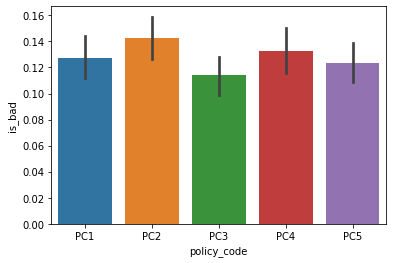

In [51]:
sns.barplot(x='policy_code', y='is_bad', data=master)
plt.show()

PC2 defaults the most

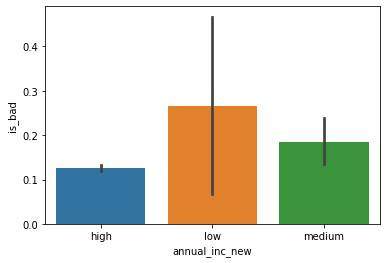

In [52]:
sns.barplot(x='annual_inc_new', y='is_bad', data=master)
plt.show()

lower the annual income, higher the default rate

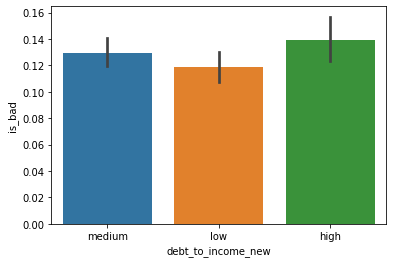

In [53]:
sns.barplot(x='debt_to_income_new', y='is_bad', data=master)
plt.show()

High dti translates into higher default rates, as expected

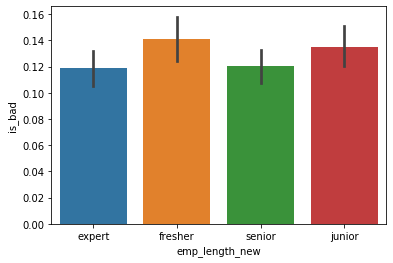

In [54]:
sns.barplot(x='emp_length_new', y='is_bad', data=master)
plt.show()

## Segmented Bivariate Analysis

We have now compared the default rates across various variables, and some of the important predictors are purpose of the loan,  annual income etc.

In the credit industry, one of the most important factors affecting default is the purpose of the loan - home loans perform differently than credit cards, credit cards are very different from debt condolidation loans etc. 

This comes from business understanding, though let's again have a look at the default rates across the purpose of the loan.

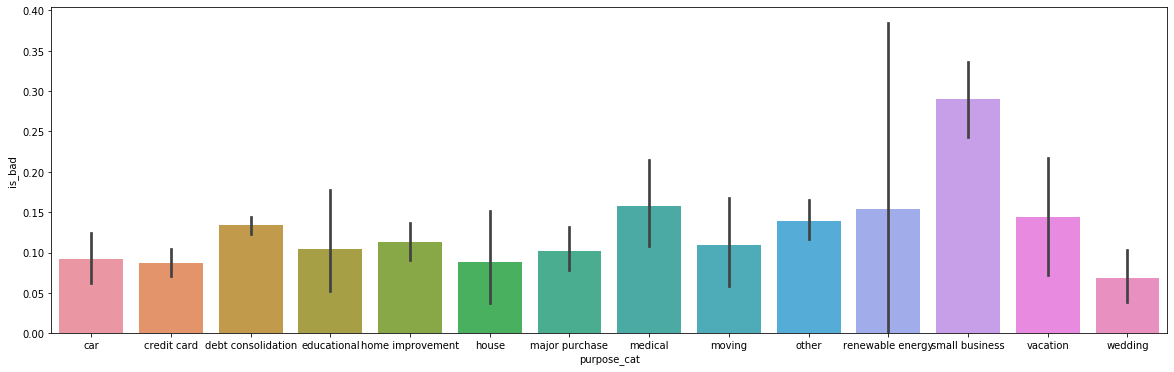

In [55]:
# purpose: small business loans defualt the most, then renewable energy and education
plt.figure(figsize=(20,6))
sns.barplot(x='purpose_cat', y='is_bad', data=master)
plt.show()

In [56]:
master['purpose_cat'].value_counts()

debt consolidation    3912
credit card           1047
other                  874
home improvement       628
major purchase         471
small business         345
car                    305
wedding                232
medical                158
moving                 137
educational             96
vacation                83
house                   79
renewable energy        13
Name: purpose_cat, dtype: int64

Let's analyse the top 4 types of loans based on purpose: consolidation, credit card, home improvement and major purchase.

In [57]:
# filtering the master df for the 4 types of loans mentioned above

master_new = master.copy()
master_new['purpose_cat'] = master_new['purpose_cat'].astype('object')
main_purposes = ["credit card","debt consolidation","home improvement","major purchase"]
master_new = master_new[master_new['purpose_cat'].isin(main_purposes)]
master_new['purpose_cat'].value_counts()



debt consolidation    3912
credit card           1047
home improvement       628
major purchase         471
Name: purpose_cat, dtype: int64

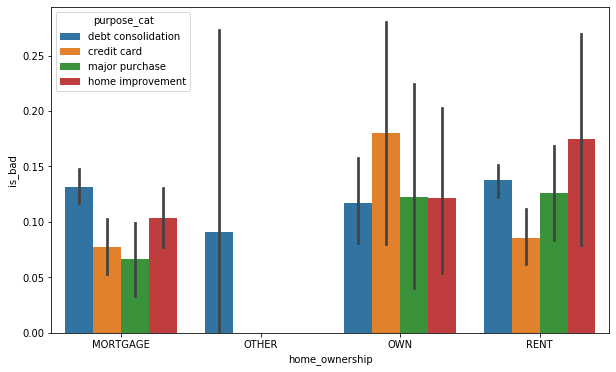

In [58]:
# let's now compare the default rates across two types of categorical variables
# is_bad (constant) and another categorical variable (which changes)

plt.figure(figsize=[10, 6])
sns.barplot(x='home_ownership', y="is_bad", hue='purpose_cat', data=master_new)
plt.show()

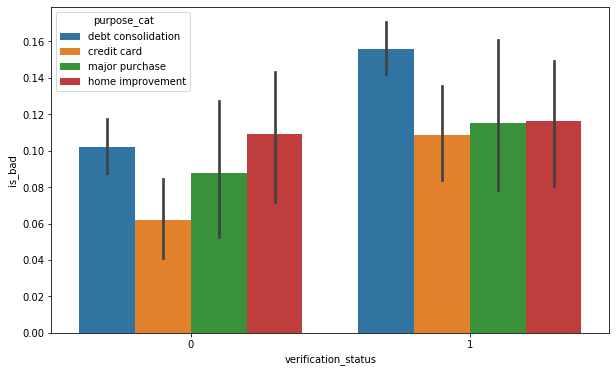

In [59]:
plt.figure(figsize=[10, 6])
sns.barplot(x='verification_status', y="is_bad", hue='purpose_cat', data=master_new)
plt.show()

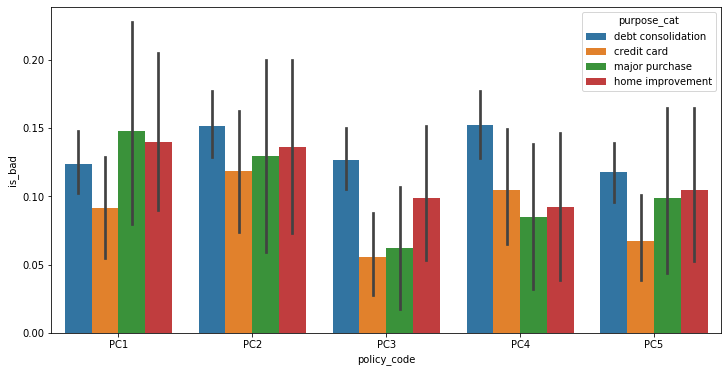

In [60]:
plt.figure(figsize=[12, 6])
sns.barplot(x='policy_code', y="is_bad", hue='purpose_cat', data=master_new)
plt.show()

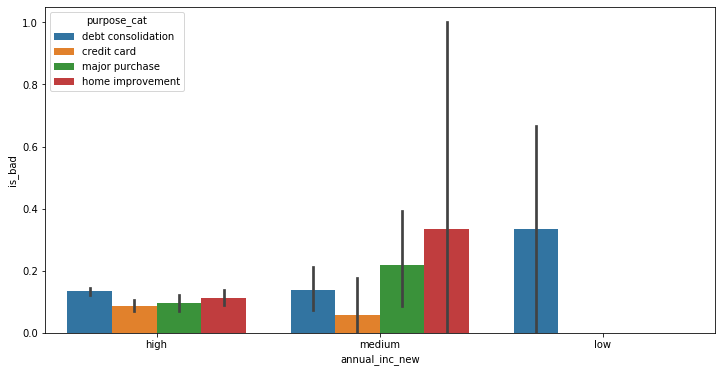

In [61]:
plt.figure(figsize=[12, 6])
sns.barplot(x='annual_inc_new', y="is_bad", hue='purpose_cat', data=master_new)
plt.show()

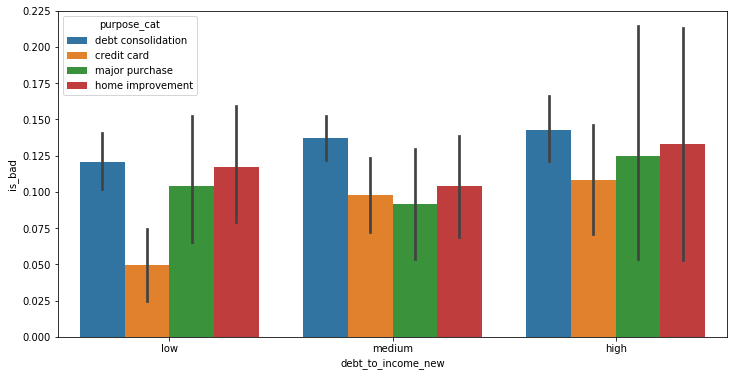

In [62]:
plt.figure(figsize=[12, 6])
sns.barplot(x='debt_to_income_new', y="is_bad", hue='purpose_cat', data=master_new)
plt.show()

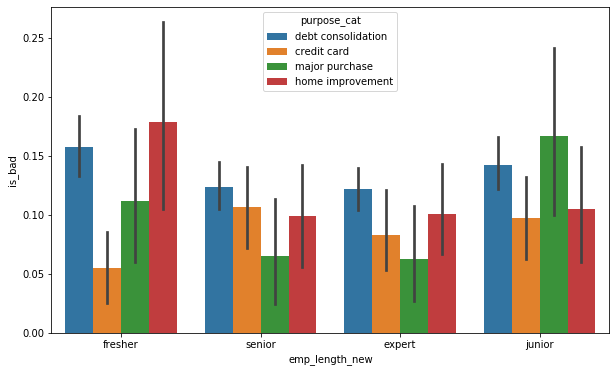

In [63]:
plt.figure(figsize=[10, 6])
sns.barplot(x='emp_length_new', y="is_bad", hue='purpose_cat', data=master_new)
plt.show()

In [64]:
# dropping the variable which cannot significantly used as categorical or numerical
master = master.drop(['open_acc','debt_to_income_new','total_acc','home_ownership','policy_code','annual_inc_new','emp_length_new','emp_title','purpose','earliest_cr_line','initial_list_status'], axis=1)

master.head()

,is_bad,emp_length,annual_inc,verification_status,pymnt_plan,purpose_cat,debt_to_income,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,revol_util,mths_since_last_major_derog,open_acc%
0,0,10,50000.0,0,0,medical,10.87,0.0,0.0,0.0,12087,12.1,1,0.340909
1,0,1,39216.0,0,0,debt consolidation,9.15,0.0,2.0,0.0,10114,64.0,2,0.800000
2,0,4,65000.0,0,0,credit card,11.24,0.0,0.0,0.0,81,0.6,3,0.500000
3,0,10,57500.0,0,0,debt consolidation,6.18,1.0,0.0,0.0,10030,37.1,2,0.260870
4,0,10,50004.0,1,0,debt consolidation,19.03,0.0,4.0,0.0,10740,40.4,3,0.380952


In [65]:
master.shape

(8380, 14)

#### For categorical variables with multiple levels, create dummy features (one-hot encoded)


In [66]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.

dummy1 = pd.get_dummies(master[['purpose_cat']], drop_first=True)

# Adding the results to the master dataframe
master = pd.concat([master, dummy1], axis=1)

#  We have created dummies for the below variables, so we can drop them
master = master.drop(['purpose_cat'], 1)

In [67]:
# checking master dataframe
print(master.shape,"\n")
print(master.info(),"\n")
print(master.head()) 

(8380, 26) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8380 entries, 0 to 9999
Data columns (total 26 columns):
is_bad                            8380 non-null int64
emp_length                        8380 non-null int64
annual_inc                        8380 non-null float64
verification_status               8380 non-null int64
pymnt_plan                        8380 non-null int64
debt_to_income                    8380 non-null float64
delinq_2yrs                       8380 non-null float64
inq_last_6mths                    8380 non-null float64
pub_rec                           8380 non-null float64
revol_bal                         8380 non-null int64
revol_util                        8380 non-null float64
mths_since_last_major_derog       8380 non-null int64
open_acc%                         8380 non-null float64
purpose_cat_credit card           8380 non-null uint8
purpose_cat_debt consolidation    8380 non-null uint8
purpose_cat_educational           8380 non-null uint8
pu

## Test-Train Split


In [68]:
# Now Splitting the data into train and test

df_train, df_test = train_test_split(master, train_size=0.70, test_size=0.30, random_state=100)
print(df_train.shape)
print(df_test.shape)

(5866, 26)
(2514, 26)


In [69]:
## Creating X_train, y_train, X_test, y_test

y_train =  df_train.pop('is_bad')
X_train = df_train
y_test =  df_test.pop('is_bad')
X_test = df_test

In [70]:
# Checking the shape of train and test data set
print(X_train.shape,"\n")
print(X_test.shape,"\n")
print(y_train.shape,"\n")
print(y_test.shape,"\n")

(5866, 25) 

(2514, 25) 

(5866,) 

(2514,) 



In [71]:
# Checking the default rate in train and test data
print(y_train.mean())
print(y_test.mean())

0.12734401636549608
0.1288782816229117


## Feature Scaling

In [72]:
scaling_list = ['annual_inc','emp_length','debt_to_income','delinq_2yrs','inq_last_6mths','pub_rec','revol_bal','revol_util','mths_since_last_major_derog']

# using Standard scaler method
scaler = StandardScaler()

X_train[scaling_list] = scaler.fit_transform(X_train[scaling_list])
X_test[scaling_list] = scaler.transform(X_test[scaling_list])

X_train.head()




,emp_length,annual_inc,verification_status,pymnt_plan,debt_to_income,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,revol_util,...,purpose_cat_home improvement,purpose_cat_house,purpose_cat_major purchase,purpose_cat_medical,purpose_cat_moving,purpose_cat_other,purpose_cat_renewable energy,purpose_cat_small business,purpose_cat_vacation,purpose_cat_wedding
1566,0.040278,-1.350655,1,0,-1.254504,-0.302513,0.644778,-0.25045,-0.686869,1.010197,...,0,0,0,0,0,0,0,0,0,0
2101,-0.548925,-1.003091,1,0,1.107053,-0.302513,-0.728594,-0.25045,-0.641121,-0.636337,...,0,0,0,0,0,0,0,0,0,0
9712,1.513286,0.026059,1,0,0.553936,-0.302513,1.331464,-0.25045,-1.084215,0.906168,...,0,0,0,0,0,1,0,0,0,0
4936,0.629481,-2.005159,0,0,0.867021,-0.302513,-0.728594,-0.25045,-0.791155,-0.439040,...,0,0,0,0,0,0,0,0,0,0
1074,0.334880,-0.350092,1,0,1.253160,-0.302513,-0.728594,-0.25045,-0.544705,0.981499,...,0,0,0,0,0,0,0,0,0,0


In [73]:
# Lets Build first Model without doing any feature selection and will check the model accuracy

import statsmodels.api as sm

# Logistic regression model
logmodel = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logmodel.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 is_bad   No. Observations:                 5866
Model:                            GLM   Df Residuals:                     5841
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2110.6
Date:                Sat, 04 Apr 2020   Deviance:                       4221.2
Time:                        11:24:53   Pearson chi2:                 5.83e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -3.2068      0.278    -11.531      0.000      -3.752      -2.662
emp_length                        -0.0087      0.043     -0.205      0.837      -0.092       0.075
annual_inc                        -0.3021      0.050     -6.008      0.000      -0.401      -0.204
verification_status                0.3509      0.083      4.215      0.000       0.188       0.514
pymnt_plan                     -7.253e-16   5.06e-16     -1.432      0.152   -1.72e-15    2.67e-16
debt_to_income                    -0.0531      0.045     -1.190      0.234      -0.141       0.034
delinq_2yrs                        0.0933      0.038      2.475      0.013       0.019       0.167
inq_last_6mths                  5.625e-06      0.041      0.000      1.000      -0.080       0.080
pub_rec                            0.0884      0.036      2.426      0.015       0.017       0.160
revol_bal                          0.1147      0.051      2.266      0.023       0.015       0.214
revol_util                         0.2899      0.045      6.371      0.000       0.201       0.379
mths_since_last_major_derog        0.0311      0.040      0.773      0.440      -0.048       0.110
open_acc%                          1.2532      0.182      6.886      0.000       0.896       1.610
purpose_cat_credit card           -0.1676      0.289     -0.581      0.561      -0.733       0.398
purpose_cat_debt consolidation     0.3639      0.261      1.396      0.163      -0.147       0.875
purpose_cat_educational            0.1176      0.459      0.256      0.798      -0.782       1.017
purpose_cat_home improvement       0.6863      0.294      2.331      0.020       0.109       1.263
purpose_cat_house                  0.3346      0.508      0.659      0.510      -0.661       1.330
purpose_cat_major purchase         0.2285      0.311      0.735      0.462      -0.381       0.838
purpose_cat_medical                0.8634      0.358      2.411      0.016       0.162       1.565
purpose_cat_moving                 0.3576      0.407      0.880      0.379      -0.439       1.154
purpose_cat_other                  0.3739      0.281      1.331      0.183      -0.177       0.925
purpose_cat_renewable energy       1.7427      0.919      1.896      0.058      -0.059       3.544
purpose_cat_small business         1.4439      0.292      4.937      0.000       0.871       2.017
purpose_cat_vacation               0.8923      0.436      2.046      0.041       0.037       1.747
purpose_cat_wedding               -0.5864      0.444     -1.320      0.187      -1.457       0.284
==================================================================================================
"""

In [74]:
# Using Logistic Regression 
logreg  = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred_logreg = logreg.predict(X_train)
y_pred_prob_logreg = logreg.predict_proba(X_train)
print("Model Accuracy: {:0.2f}%".format(metrics.accuracy_score(y_train, y_pred_logreg)*100))
print("Model ROC AUC: {:0.2f}%".format(metrics.roc_auc_score(y_train, y_pred_prob_logreg[:,1])*100))


Model Accuracy: 87.32%
Model ROC AUC: 66.55%


## Now lets do the feature selection 
- Feature selection is used to select the most useful features in a dataset. If we add irrelevant features in the model,
It will just make the model worst(Garbage IN , Garbage Out). It is also used to make model simple (Occam's Razor). I have used 6 feature selection alogrithm in this case study.

In [75]:
feature_name = list(X_train.columns)

# no of maximum features we need to select
num_features = 15

## 1.Pearson Correlation

We check the absolute value of the Pearson's correlation between the target and numerical features. We keep the top n features based on this criterion.

In [76]:
def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
        
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature


In [77]:
cor_support, cor_feature = cor_selector(X_train, y_train,num_features)
print(str(len(cor_feature)), 'selected features')
print(cor_feature)

15 selected features
['debt_to_income', 'revol_bal', 'purpose_cat_debt consolidation', 'purpose_cat_renewable energy', 'purpose_cat_major purchase', 'purpose_cat_medical', 'emp_length', 'pub_rec', 'purpose_cat_wedding', 'verification_status', 'purpose_cat_credit card', 'annual_inc', 'revol_util', 'purpose_cat_small business', 'open_acc%']


##  2. Chi-Square Features
We calculate the chi-square metric between the target and the numerical variable and only select the variable with the maximum chi-squared values.

In [78]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

X_norm = MinMaxScaler().fit_transform(X_train)
chi_selector = SelectKBest(chi2, k=num_features)
chi_selector.fit(X_norm, y_train)
chi_support = chi_selector.get_support()
chi_feature = X_train.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')
print(chi_feature)

15 selected features
['annual_inc', 'verification_status', 'delinq_2yrs', 'pub_rec', 'revol_bal', 'revol_util', 'open_acc%', 'purpose_cat_credit card', 'purpose_cat_debt consolidation', 'purpose_cat_major purchase', 'purpose_cat_medical', 'purpose_cat_renewable energy', 'purpose_cat_small business', 'purpose_cat_vacation', 'purpose_cat_wedding']


## 3. Recursive Feature Elimination

In [79]:
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_features, step=10, verbose=5)
rfe_selector.fit(X_train, y_train)

Fitting estimator with 25 features.


RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=15, step=10, verbose=5)

In [80]:
rfe_support = rfe_selector.get_support()
rfe_feature = X_train.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')
print(rfe_feature)

15 selected features
['annual_inc', 'verification_status', 'revol_util', 'open_acc%', 'purpose_cat_credit card', 'purpose_cat_debt consolidation', 'purpose_cat_home improvement', 'purpose_cat_house', 'purpose_cat_medical', 'purpose_cat_moving', 'purpose_cat_other', 'purpose_cat_renewable energy', 'purpose_cat_small business', 'purpose_cat_vacation', 'purpose_cat_wedding']


## 4. Lasso: SelectFromModel

In [81]:
# Using L2 regularization as penalty.
    
from sklearn.feature_selection import SelectFromModel


embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l2"), max_features=num_features)
embeded_lr_selector.fit(X_train, y_train)

SelectFromModel(estimator=LogisticRegression(C=1.0, class_weight=None,
                                             dual=False, fit_intercept=True,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=100, multi_class='auto',
                                             n_jobs=None, penalty='l2',
                                             random_state=None, solver='lbfgs',
                                             tol=0.0001, verbose=0,
                                             warm_start=False),
                max_features=15, norm_order=1, prefit=False, threshold=None)

In [82]:
embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X_train.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')
print(embeded_lr_feature)

9 selected features
['verification_status', 'open_acc%', 'purpose_cat_credit card', 'purpose_cat_home improvement', 'purpose_cat_medical', 'purpose_cat_renewable energy', 'purpose_cat_small business', 'purpose_cat_vacation', 'purpose_cat_wedding']


## 5. Random Forest: SelectFromModel 


In [83]:
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=20)
embeded_rf_selector.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,

In [84]:
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X_train.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')
print(embeded_rf_feature)

7 selected features
['emp_length', 'annual_inc', 'debt_to_income', 'inq_last_6mths', 'revol_bal', 'revol_util', 'open_acc%']


## 6. LightGBM : SelectFromModel

In [85]:
from lightgbm import LGBMClassifier

lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

embeded_lgb_selector = SelectFromModel(lgbc, max_features=23)
embeded_lgb_selector.fit(X_train, y_train)

SelectFromModel(estimator=LGBMClassifier(boosting_type='gbdt',
                                         class_weight=None,
                                         colsample_bytree=0.2,
                                         importance_type='split',
                                         learning_rate=0.05, max_depth=-1,
                                         min_child_samples=20,
                                         min_child_weight=40,
                                         min_split_gain=0.01, n_estimators=500,
                                         n_jobs=-1, num_leaves=32,
                                         objective=None, random_state=None,
                                         reg_alpha=3, reg_lambda=1, silent=True,
                                         subsample=1.0,
                                         subsample_for_bin=200000,
                                         subsample_freq=0),
                max_features=23, norm_order=1, prefit=False, 

In [86]:
embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X_train.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')
print(embeded_lgb_feature)

7 selected features
['emp_length', 'annual_inc', 'debt_to_income', 'inq_last_6mths', 'revol_bal', 'revol_util', 'open_acc%']


In [87]:
pd.set_option('display.max_rows', None)

# put all selection together

feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'Chi-2':chi_support, 'RFE':rfe_support, 'Logistics':embeded_lr_support,
                                    'Random Forest':embeded_rf_support, 'LightGBM':embeded_lgb_support})

# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)

# display the features
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(num_features)

,Feature,Pearson,Chi-2,RFE,Logistics,Random Forest,LightGBM,Total
1,open_acc%,True,True,True,True,True,True,6
2,revol_util,True,True,True,False,True,True,5
3,annual_inc,True,True,True,False,True,True,5
4,verification_status,True,True,True,True,False,False,4
5,revol_bal,True,True,False,False,True,True,4
6,purpose_cat_wedding,True,True,True,True,False,False,4
7,purpose_cat_small business,True,True,True,True,False,False,4
8,purpose_cat_renewable energy,True,True,True,True,False,False,4
9,purpose_cat_medical,True,True,True,True,False,False,4
10,purpose_cat_credit card,True,True,True,True,False,False,4


In [88]:
# Lets take the features which are present in atleast 4 algo and drop the rest

col = ['open_acc%','revol_util','annual_inc','verification_status','revol_bal',
       'purpose_cat_wedding','purpose_cat_small business','purpose_cat_renewable energy','purpose_cat_medical','purpose_cat_credit card']

In [89]:
# Accessing the model with Statsmodel

X_train_sm = sm.add_constant(X_train[col])
model1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = model1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 is_bad   No. Observations:                 5866
Model:                            GLM   Df Residuals:                     5855
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2121.9
Date:                Sat, 04 Apr 2020   Deviance:                       4243.7
Time:                        11:24:59   Pearson chi2:                 5.86e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -2.7907      0.117    -23.914      0.000      -3.019      -2.562
open_acc%                        1.1880      0.178      6.677      0.000       0.839       1.537
revol_util                       0.2890      0.044      6.513      0.000       0.202       0.376
annual_inc                      -0.2643      0.048     -5.502      0.000      -0.359      -0.170
verification_status              0.3484      0.083      4.210      0.000       0.186       0.511
revol_bal                        0.0725      0.047      1.536      0.124      -0.020       0.165
purpose_cat_wedding             -0.9509      0.368     -2.585      0.010      -1.672      -0.230
purpose_cat_small business       1.0852      0.154      7.069      0.000       0.784       1.386
purpose_cat_renewable energy     1.3198      0.875      1.508      0.131      -0.395       3.035
purpose_cat_medical              0.5230      0.257      2.032      0.042       0.019       1.027
purpose_cat_credit card         -0.5364      0.143     -3.747      0.000      -0.817      -0.256
================================================================================================
"""

In [90]:
# Check for the VIF values of the feature variables. 

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

vif

,Features,VIF
0,open_acc%,2.09
3,verification_status,1.93
4,revol_bal,1.43
1,revol_util,1.26
2,annual_inc,1.20
9,purpose_cat_credit card,1.15
6,purpose_cat_small business,1.06
5,purpose_cat_wedding,1.04
8,purpose_cat_medical,1.02
7,purpose_cat_renewable energy,1.00


In [91]:
# VIF is less than 5, it means that there is no multi-collinearity.

# The variable 'purpose_cat_renewable energy' has the highest p-value. So let's start by dropping it

col = ['open_acc%','annual_inc','revol_util','revol_bal','verification_status',
       'purpose_cat_wedding','purpose_cat_small business','purpose_cat_medical','purpose_cat_credit card']

In [92]:
# Accessing the model with Statsmodel

X_train_sm = sm.add_constant(X_train[col])
model2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = model2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 is_bad   No. Observations:                 5866
Model:                            GLM   Df Residuals:                     5856
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2122.8
Date:                Sat, 04 Apr 2020   Deviance:                       4245.6
Time:                        11:25:00   Pearson chi2:                 5.86e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -2.7838      0.117    -23.894      0.000      -3.012      -2.555
open_acc%                      1.1812      0.178      6.643      0.000       0.833       1.530
annual_inc                    -0.2642      0.048     -5.501      0.000      -0.358      -0.170
revol_util                     0.2900      0.044      6.540      0.000       0.203       0.377
revol_bal                      0.0727      0.047      1.539      0.124      -0.020       0.165
verification_status            0.3468      0.083      4.193      0.000       0.185       0.509
purpose_cat_wedding           -0.9528      0.368     -2.591      0.010      -1.674      -0.232
purpose_cat_small business     1.0829      0.153      7.055      0.000       0.782       1.384
purpose_cat_medical            0.5208      0.257      2.024      0.043       0.016       1.025
purpose_cat_credit card       -0.5394      0.143     -3.769      0.000      -0.820      -0.259
==============================================================================================
"""

In [93]:
# The variable 'revol_bal' has the highest p-value. Lets drop it

col = ['open_acc%','annual_inc','revol_util','verification_status',
       'purpose_cat_wedding','purpose_cat_small business','purpose_cat_medical','purpose_cat_credit card']

In [94]:
# Accessing the model with Statsmodel

X_train_sm = sm.add_constant(X_train[col])
finalmodel = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = finalmodel.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 is_bad   No. Observations:                 5866
Model:                            GLM   Df Residuals:                     5857
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2124.0
Date:                Sat, 04 Apr 2020   Deviance:                       4248.0
Time:                        11:25:01   Pearson chi2:                 5.84e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -2.7794      0.116    -23.903      0.000      -3.007      -2.551
open_acc%                      1.1719      0.177      6.609      0.000       0.824       1.519
annual_inc                    -0.2367      0.044     -5.347      0.000      -0.323      -0.150
revol_util                     0.3154      0.041      7.715      0.000       0.235       0.396
verification_status            0.3496      0.083      4.228      0.000       0.188       0.512
purpose_cat_wedding           -0.9698      0.368     -2.638      0.008      -1.690      -0.249
purpose_cat_small business     1.0707      0.153      6.995      0.000       0.771       1.371
purpose_cat_medical            0.5136      0.257      1.996      0.046       0.009       1.018
purpose_cat_credit card       -0.5212      0.143     -3.655      0.000      -0.801      -0.242
==============================================================================================
"""

In [95]:
# The variable 'purpose_cat_medical' has the highest p-value. Lets drop it

col = ['open_acc%','annual_inc','revol_util','verification_status',
       'purpose_cat_wedding','purpose_cat_small business','purpose_cat_credit card']

# Accessing the model with Statsmodel

X_train_sm = sm.add_constant(X_train[col])
finalmodel = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = finalmodel.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 is_bad   No. Observations:                 5866
Model:                            GLM   Df Residuals:                     5858
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2125.8
Date:                Sat, 04 Apr 2020   Deviance:                       4251.6
Time:                        11:25:01   Pearson chi2:                 5.84e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -2.7661      0.116    -23.861      0.000      -2.993      -2.539
open_acc%                      1.1736      0.177      6.622      0.000       0.826       1.521
annual_inc                    -0.2377      0.044     -5.372      0.000      -0.324      -0.151
revol_util                     0.3121      0.041      7.640      0.000       0.232       0.392
verification_status            0.3491      0.083      4.224      0.000       0.187       0.511
purpose_cat_wedding           -0.9840      0.367     -2.678      0.007      -1.704      -0.264
purpose_cat_small business     1.0565      0.153      6.913      0.000       0.757       1.356
purpose_cat_credit card       -0.5337      0.142     -3.748      0.000      -0.813      -0.255
==============================================================================================
"""

In [96]:
# Checking VIF again

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

vif

,Features,VIF
0,open_acc%,2.07
3,verification_status,1.93
6,purpose_cat_credit card,1.14
1,annual_inc,1.05
5,purpose_cat_small business,1.05
4,purpose_cat_wedding,1.04
2,revol_util,1.02


### We can see that P value is now less and there are no variables which has high VIF. Now we can build the model

In [97]:
# Lets start with Logistic regression

logreg_model = LogisticRegression(class_weight='balanced')
logreg_model.fit(X_train[col],y_train) 

y_train_pred = logreg_model.predict(X_train[col])
y_train_pred_prob = logreg_model.predict_proba(X_train[col])

print("Model Accuracy: {:0.2f}%".format(metrics.accuracy_score(y_train, y_train_pred)*100))
print("Model ROC AUC: {:0.2f}%".format(metrics.roc_auc_score(y_train, y_train_pred_prob[:,1])*100))

Model Accuracy: 61.01%
Model ROC AUC: 65.73%


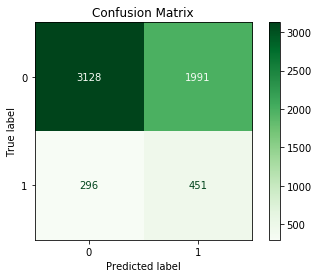

In [98]:
# Plot confusion matrix

disp = metrics.plot_confusion_matrix(logreg_model, X_train[col], y_train, display_labels=None,
                                 cmap=plt.cm.Greens, values_format='g')
disp.ax_.set_title("Confusion Matrix")
plt.show()

### Crossvalidation - Logistic Regression Model

In [99]:
# creating a KFold object with 10 splits 
folds = KFold(n_splits = 10, shuffle = True, random_state = 4)

# computing the cross-validation scores 
# note that the argument cv takes the 'folds' object, and
# we have specified 'roc_auc' as the metric

cv_results = cross_val_score(logreg_model, X_train[col], y_train, cv = folds, scoring = 'roc_auc') 

# print 10 accuracies obtained from the 10 folds
print(cv_results,"\n")
print(classification_report(y_train,y_train_pred))



[0.6123341  0.68749318 0.6091673  0.69201257 0.69337988 0.63407385
 0.70862361 0.65097674 0.63980675 0.62300014] 

              precision    recall  f1-score   support

           0       0.91      0.61      0.73      5119
           1       0.18      0.60      0.28       747

    accuracy                           0.61      5866
   macro avg       0.55      0.61      0.51      5866
weighted avg       0.82      0.61      0.68      5866



## Finding Optimal Cutoff Point(Threshold)
- Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [100]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]

# Creating a dataframe with the actual default and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Default':y_train, 'Default_Prob':y_train_pred_prob[:,1]})
y_train_pred_final['CustID'] = y_train.index

for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Default_Prob.map(lambda x: 1 if x > i else 0)

y_train_pred_final.head()



,Default,Default_Prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
1566,1,0.627756,1566,1,1,1,1,1,1,1,0,0,0
2101,0,0.421060,2101,1,1,1,1,1,0,0,0,0,0
9712,0,0.504923,9712,1,1,1,1,1,1,0,0,0,0
4936,1,0.514431,4936,1,1,1,1,1,1,0,0,0,0
1074,0,0.492056,1074,1,1,1,1,1,0,0,0,0,0


In [101]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Default, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.127344  1.000000  0.000000
0.1   0.1  0.127685  1.000000  0.000391
0.2   0.2  0.142175  0.997323  0.017386
0.3   0.3  0.226389  0.962517  0.118969
0.4   0.4  0.408967  0.851406  0.344403
0.5   0.5  0.610126  0.603748  0.611057
0.6   0.6  0.777702  0.326640  0.843524
0.7   0.7  0.857313  0.133869  0.962883
0.8   0.8  0.870610  0.029451  0.993358
0.9   0.9  0.872826  0.001339  1.000000


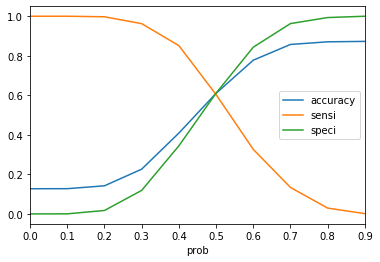

In [102]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.5 is the optimum point to take it as a cutoff probability.

In [103]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Default_Prob.map( lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Default,Default_Prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
1566,1,0.627756,1566,1,1,1,1,1,1,1,0,0,0,1
2101,0,0.421060,2101,1,1,1,1,1,0,0,0,0,0,0
9712,0,0.504923,9712,1,1,1,1,1,1,0,0,0,0,1
4936,1,0.514431,4936,1,1,1,1,1,1,0,0,0,0,1
1074,0,0.492056,1074,1,1,1,1,1,0,0,0,0,0,0


In [104]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Default, y_train_pred_final.final_predicted )
confusion2

array([[3128, 1991],
       [ 296,  451]], dtype=int64)

In [105]:
# Confusion Matrix

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity: {:2.2f}%".format((TP / float(TP+FN))*100))

# Let us calculate specificity
print("Specifity: {:2.2f}%".format((TN / float(TN+FP))*100))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Postive Rate: {:2.2f}%".format((FP/ float(TN+FP))*100))

# positive predictive value 
print ("Positive Predicitve Value: {:2.2f}%".format((TP / float(TP+FP))*100))

# Negative predictive value
print("Negative Predictive Value: {:2.2f}%".format((TN / float(TN+ FN))*100))

Sensitivity: 60.37%
Specifity: 61.11%
False Postive Rate: 38.89%
Positive Predicitve Value: 18.47%
Negative Predictive Value: 91.36%


### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [106]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score(actual, probs )
    plt.figure(figsize=(10, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

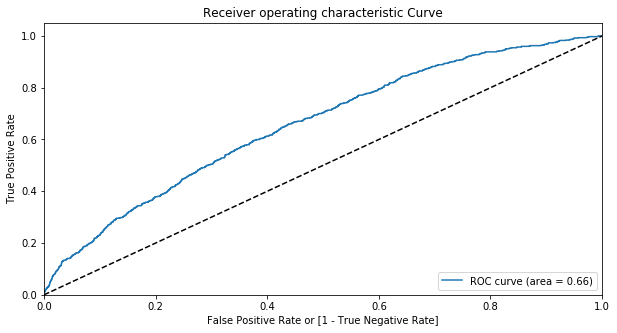

In [107]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Default, y_train_pred_final.Default_Prob, drop_intermediate = False)
draw_roc(y_train_pred_final.Default, y_train_pred_final.Default_Prob)


### Making predictions on the test set

In [108]:
X_test = X_test[col]
X_test.head()

,open_acc%,annual_inc,revol_util,verification_status,purpose_cat_wedding,purpose_cat_small business,purpose_cat_credit card
824,0.322581,2.094892,0.916929,0,0,0,0
1715,0.473684,0.966438,-0.004986,1,0,0,0
6883,0.380952,-0.726394,-0.284789,0,0,0,0
9593,0.400000,0.778362,-1.346606,1,0,0,0
8835,0.307692,0.214135,-0.578941,1,0,0,0


In [109]:
y_test_pred = logreg_model.predict(X_test[col])
y_test_pred_prob = logreg_model.predict_proba(X_test[col])

print("Model Accuracy: {:0.2f}%".format(metrics.accuracy_score(y_test, y_test_pred)*100))
print("Model ROC AUC: {:0.2f}%".format(metrics.roc_auc_score(y_test, y_test_pred_prob[:,1])*100))


Model Accuracy: 61.61%
Model ROC AUC: 65.28%


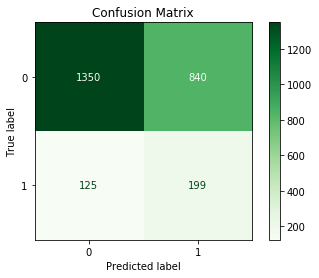

In [110]:
# Plot confusion matrix for test data

disp = metrics.plot_confusion_matrix(logreg_model, X_test[col], y_test, display_labels=None,
                                 cmap=plt.cm.Greens, values_format='g')
disp.ax_.set_title("Confusion Matrix")
plt.show()

In [111]:
# Confusion Matrix for test data
confusion = metrics.confusion_matrix(y_test, y_test_pred)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity/Recall: {:2.2f}%".format((TP / float(TP+FN))*100))

# Let us calculate specificity
print("Specifity: {:2.2f}%".format((TN / float(TN+FP))*100))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Postive Rate: {:2.2f}%".format((FP/ float(TN+FP))*100))

# positive predictive value 
print ("Positive Predicitve Value/Precision: {:2.2f}%".format((TP / float(TP+FP))*100))

# Negative predictive value
print("Negative Predictive Value: {:2.2f}%".format((TN / float(TN+ FN))*100))

# F1 Score
print("Model F1 Score: {:0.2f}%".format(metrics.f1_score(y_test, y_test_pred)*100))

Sensitivity/Recall: 61.42%
Specifity: 61.64%
False Postive Rate: 38.36%
Positive Predicitve Value/Precision: 19.15%
Negative Predictive Value: 91.53%
Model F1 Score: 29.20%


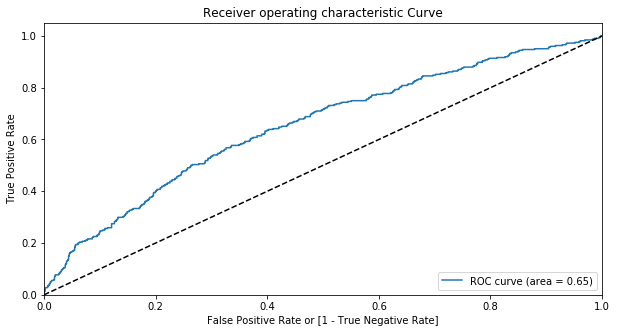

In [112]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred_prob[:, 1], drop_intermediate = False)
draw_roc(y_test, y_test_pred_prob[:, 1])


## Precision and Recall Curve for train set and test set

In [113]:
def draw_precision_recall(actual, probs, predicted):
    precision, recall, thresholds = metrics.precision_recall_curve(actual, probs)
    plt.figure(figsize=(10, 5))
    auc_score = metrics.auc(recall, precision)
    f1_score = metrics.f1_score(actual, predicted)
    # summarize scores
    print('Logistic: f1=%.3f auc=%.3f' % (f1_score, auc_score))
    no_skill = len(actual[actual==1]) / len(actual)
    plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    plt.plot(recall, precision, marker='.', label='Logistic')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc="upper right")
    plt.show()

    return None

Logistic: f1=0.283 auc=0.228


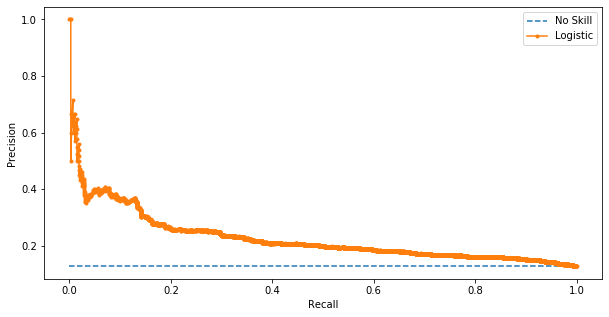

In [114]:
# Precision Recall curve for train data
draw_precision_recall(y_train_pred_final.Default, y_train_pred_final.Default_Prob,y_train_pred)

Logistic: f1=0.292 auc=0.234


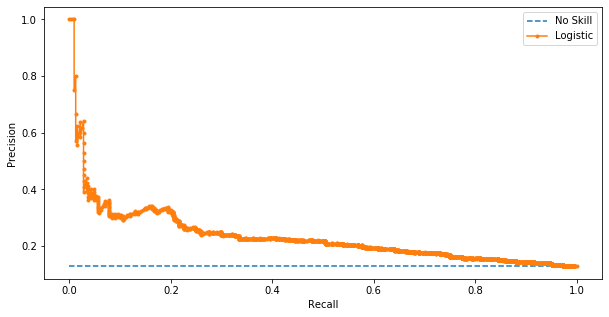

In [115]:
# Precision Recall curve for test data
draw_precision_recall(y_test, y_test_pred_prob[:, 1],y_test_pred)

## Building Model on Random Forest

In [116]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200,300], 
    "class_weight": ['balanced','balanced_subsample'],
    "criterion":['gini','entropy'],
    "max_features":['auto','sqrt','log2']
}

# specify number of folds for k-fold CV
folds = StratifiedKFold(n_splits=5,shuffle= True, random_state=100)

# instantiate the model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = folds,scoring='roc_auc', n_jobs = -1,verbose = 1,)

# Fit the grid search to the data
grid_search.fit(X_train[col],y_train)



Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   43.9s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed: 10.8min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              mi...
             iid='deprecated', n_jobs=-1,
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         

In [117]:
# printing the optimal accuracy score and hyperparameters

print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.6376211024247468 using {'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 100}


In [118]:
# Final Random Forest model with the best hyperparameters


rfc_final = RandomForestClassifier(bootstrap=True, oob_score = True,
                             max_depth=grid_search.best_params_['max_depth'],
                             min_samples_leaf=grid_search.best_params_['min_samples_leaf'], 
                             min_samples_split=grid_search.best_params_['min_samples_split'],
                             max_features=grid_search.best_params_['max_features'],
                             n_estimators=grid_search.best_params_['n_estimators'],
                             class_weight=grid_search.best_params_['class_weight'],
                             criterion = grid_search.best_params_['criterion'])
# Fitting
rfc_final.fit(X_train[col], y_train)

print('OOB Score: ', rfc_final.oob_score_)



OOB Score:  0.6077395158540744


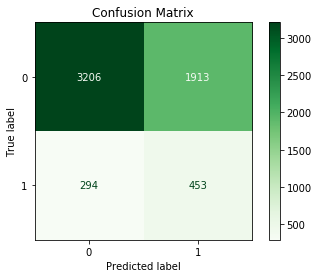

In [119]:
# Plot confusion matrix for train data

disp = metrics.plot_confusion_matrix(rfc_final, X_train[col], y_train, display_labels=None,
                                 cmap=plt.cm.Greens, values_format='g')
disp.ax_.set_title("Confusion Matrix")
plt.show()

In [120]:
y_train_pred_rfc = rfc_final.predict(X_train[col])
y_train_pred_prob_rfc = rfc_final.predict_proba(X_train[col])

print(classification_report(y_train,y_train_pred_rfc))

              precision    recall  f1-score   support

           0       0.92      0.63      0.74      5119
           1       0.19      0.61      0.29       747

    accuracy                           0.62      5866
   macro avg       0.55      0.62      0.52      5866
weighted avg       0.82      0.62      0.69      5866



In [121]:
# Finding Optimal Value

# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]

# Creating a dataframe with the actual default and the predicted probabilities

y_train_pred_rfc_final = pd.DataFrame({'Default':y_train, 'Default_Prob':y_train_pred_prob_rfc[:,1]})
y_train_pred_rfc_final['CustID'] = y_train.index

for i in numbers:
    y_train_pred_rfc_final[i]= y_train_pred_rfc_final.Default_Prob.map(lambda x: 1 if x > i else 0)

    
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df_rfc = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_rfc_final.Default, y_train_pred_rfc_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df_rfc.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df_rfc)




     prob  accuracy     sensi     speci
0.0   0.0  0.127344  1.000000  0.000000
0.1   0.1  0.127344  1.000000  0.000000
0.2   0.2  0.127344  1.000000  0.000000
0.3   0.3  0.132629  1.000000  0.006056
0.4   0.4  0.259120  0.961178  0.156671
0.5   0.5  0.623764  0.606426  0.626294
0.6   0.6  0.859529  0.100402  0.970307
0.7   0.7  0.872656  0.000000  1.000000
0.8   0.8  0.872656  0.000000  1.000000
0.9   0.9  0.872656  0.000000  1.000000


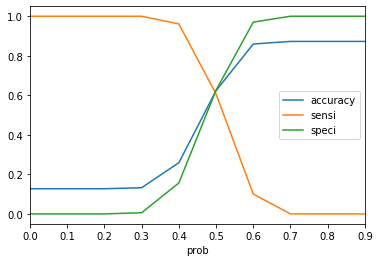

In [122]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df_rfc.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [123]:
y_train_pred_rfc_final['final_predicted'] = y_train_pred_rfc_final.Default_Prob.map( lambda x: 1 if x > 0.5 else 0)

confusion_rfc = metrics.confusion_matrix(y_train_pred_rfc_final.Default, y_train_pred_rfc_final.final_predicted )
TP = confusion_rfc[1,1] # true positive 
TN = confusion_rfc[0,0] # true negatives
FP = confusion_rfc[0,1] # false positives
FN = confusion_rfc[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity: {:2.2f}%".format((TP / float(TP+FN))*100))

# Let us calculate specificity
print("Specifity: {:2.2f}%".format((TN / float(TN+FP))*100))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Postive Rate: {:2.2f}%".format((FP/ float(TN+FP))*100))

# positive predictive value 
print ("Positive Predicitve Value: {:2.2f}%".format((TP / float(TP+FP))*100))

# Negative predictive value
print("Negative Predictive Value: {:2.2f}%".format((TN / float(TN+ FN))*100))

Sensitivity: 60.64%
Specifity: 62.63%
False Postive Rate: 37.37%
Positive Predicitve Value: 19.15%
Negative Predictive Value: 91.60%


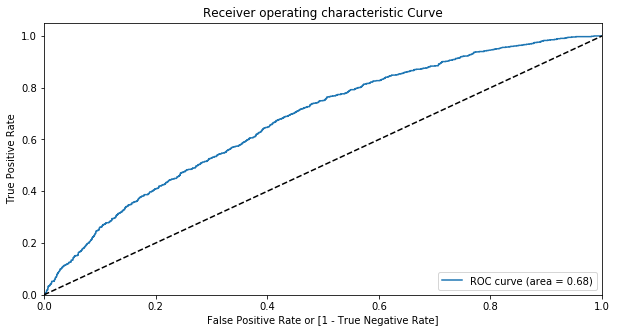

In [124]:
draw_roc(y_train_pred_rfc_final.Default, y_train_pred_rfc_final.Default_Prob)

In [125]:
# Making prediction on test data set

y_test_pred_rfc = rfc_final.predict(X_test[col])
y_test_pred_prob_rfc = rfc_final.predict_proba(X_test[col])

print("Model Accuracy: {:0.2f}%".format(metrics.accuracy_score(y_test, y_test_pred_rfc)*100))
print("Model ROC AUC: {:0.2f}%".format(metrics.roc_auc_score(y_test, y_test_pred_prob_rfc[:,1])*100))

Model Accuracy: 61.69%
Model ROC AUC: 64.52%


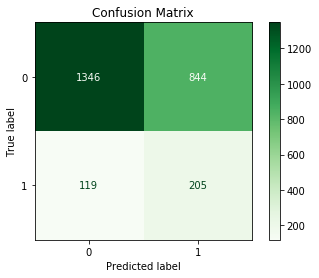

In [126]:
# Plot confusion matrix for test data

disp = metrics.plot_confusion_matrix(rfc_final, X_test[col], y_test, display_labels=None,
                                 cmap=plt.cm.Greens, values_format='g')
disp.ax_.set_title("Confusion Matrix")
plt.show()

In [127]:
# Confusion Matrix for test data
confusion = metrics.confusion_matrix(y_test, y_test_pred_rfc)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity/Recall: {:2.2f}%".format((TP / float(TP+FN))*100))

# Let us calculate specificity
print("Specifity: {:2.2f}%".format((TN / float(TN+FP))*100))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Postive Rate: {:2.2f}%".format((FP/ float(TN+FP))*100))

# positive predictive value 
print ("Positive Predicitve Value/Precision: {:2.2f}%".format((TP / float(TP+FP))*100))

# Negative predictive value
print("Negative Predictive Value: {:2.2f}%".format((TN / float(TN+ FN))*100))

# F1 Score
print("Model F1 Score: {:0.2f}%".format(metrics.f1_score(y_test, y_test_pred)*100))

Sensitivity/Recall: 63.27%
Specifity: 61.46%
False Postive Rate: 38.54%
Positive Predicitve Value/Precision: 19.54%
Negative Predictive Value: 91.88%
Model F1 Score: 29.20%


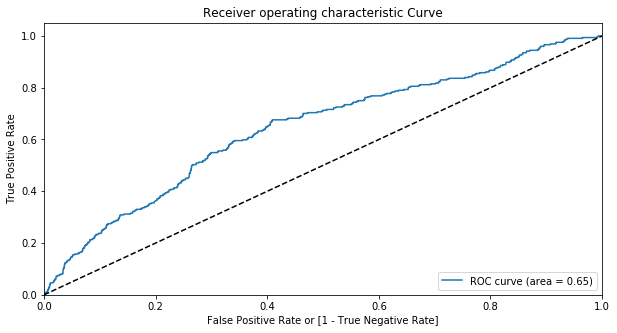

In [128]:
draw_roc(y_test, y_test_pred_prob_rfc[:, 1])

Logistic: f1=0.291 auc=0.222


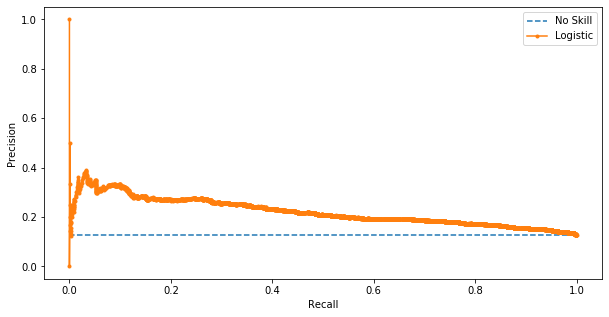

In [129]:
# Precision Recall curve for train data

draw_precision_recall(y_train_pred_rfc_final.Default, y_train_pred_rfc_final.Default_Prob,y_train_pred_rfc)

Logistic: f1=0.299 auc=0.212


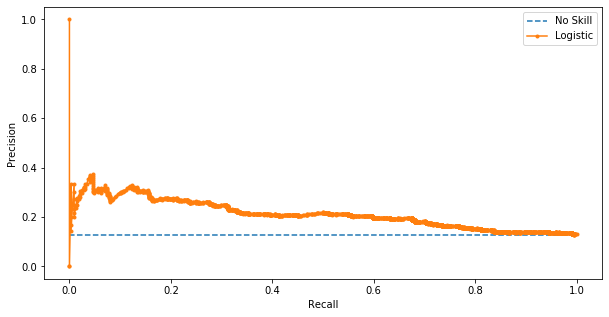

In [130]:
# Precision Recall curve for test data
draw_precision_recall(y_test, y_test_pred_prob_rfc[:, 1],y_test_pred_rfc)

## Building Model on Support Vector Machine

In [131]:
# Create the parameter grid

param_grid = {'C':[1, 10, 100], 
             'gamma': [1e-2, 1e-3, 1e-4],
             'kernel': ['linear', 'rbf', 'poly']}

# specify number of folds for k-fold CV
folds = StratifiedKFold(n_splits=5,shuffle= True, random_state=100)

# instantiate a model 
svc_grid_search = svm.SVC(class_weight='balanced')

# create a classifier to perform grid search
svm_model = GridSearchCV(svc_grid_search, param_grid=param_grid, cv = folds,scoring='roc_auc', n_jobs = -1,verbose = 1, return_train_score = True)

# Fit
svm_model.fit(X_train[col],y_train)



Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   27.8s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:  2.0min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight='balanced', coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 10, 100], 'gamma': [0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=1)

In [132]:
# results
cv_results = pd.DataFrame(svm_model.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.642438,0.063262,0.108108,0.013182,1,0.01,linear,"{'C': 1, 'gamma': 0.01, 'kernel': 'linear'}",0.700026,0.633425,...,0.653786,0.028008,9,0.643942,0.660173,0.664785,0.656020,0.653771,0.655738,0.006995
1,2.009085,0.125138,0.239162,0.023935,1,0.01,rbf,"{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}",0.701165,0.630290,...,0.651175,0.029503,13,0.641913,0.659587,0.664785,0.656695,0.651857,0.654968,0.007756
2,1.646251,0.165440,0.213974,0.071979,1,0.01,poly,"{'C': 1, 'gamma': 0.01, 'kernel': 'poly'}",0.656055,0.612134,...,0.619735,0.019735,19,0.613102,0.627110,0.631094,0.627570,0.618614,0.623498,0.006622
3,1.389766,0.088657,0.096945,0.006559,1,0.001,linear,"{'C': 1, 'gamma': 0.001, 'kernel': 'linear'}",0.700026,0.633425,...,0.653786,0.028008,9,0.643942,0.660173,0.664785,0.656020,0.653771,0.655738,0.006995
4,2.595099,0.292843,0.353548,0.056418,1,0.001,rbf,"{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}",0.663991,0.606804,...,0.625956,0.021485,18,0.616456,0.631583,0.634717,0.629915,0.625564,0.627647,0.006328
5,1.521922,0.168685,0.184714,0.026222,1,0.001,poly,"{'C': 1, 'gamma': 0.001, 'kernel': 'poly'}",0.656055,0.612134,...,0.619735,0.019735,19,0.613102,0.627110,0.631094,0.627570,0.618614,0.623498,0.006622
6,1.412793,0.058073,0.096721,0.004347,1,0.0001,linear,"{'C': 1, 'gamma': 0.0001, 'kernel': 'linear'}",0.700026,0.633425,...,0.653786,0.028008,9,0.643942,0.660173,0.664785,0.656020,0.653771,0.655738,0.006995
7,1.677142,0.075730,0.233773,0.004994,1,0.0001,rbf,"{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}",0.647025,0.598306,...,0.614452,0.017577,27,0.606985,0.619594,0.620545,0.616555,0.614201,0.615576,0.004847
8,1.262983,0.074246,0.153376,0.022923,1,0.0001,poly,"{'C': 1, 'gamma': 0.0001, 'kernel': 'poly'}",0.656055,0.612134,...,0.619735,0.019735,19,0.613102,0.627110,0.631094,0.627570,0.618614,0.623498,0.006622
9,2.279649,0.101453,0.094639,0.008337,10,0.01,linear,"{'C': 10, 'gamma': 0.01, 'kernel': 'linear'}",0.699915,0.633346,...,0.653812,0.028017,3,0.644019,0.660174,0.664788,0.656203,0.653796,0.655796,0.006970


In [133]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')
cv_results_linear = cv_results[cv_results['param_kernel']=='linear']
cv_results_rbf = cv_results[cv_results['param_kernel']=='rbf']
cv_results_poly = cv_results[cv_results['param_kernel']=='poly']

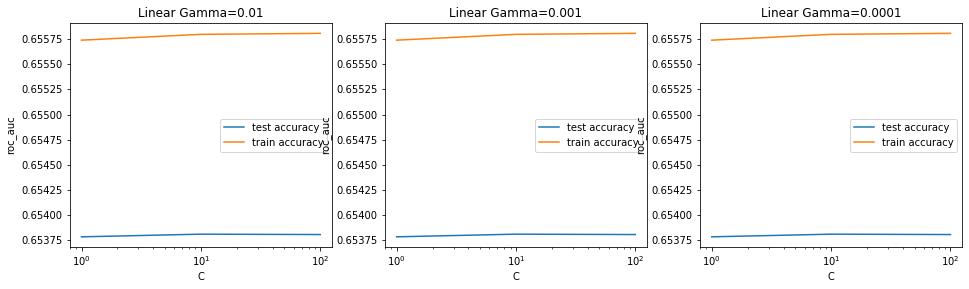

In [134]:
#  plotting
plt.figure(figsize=(16,14))

# subplot 1/3
plt.subplot(331) 
gamma_01 = cv_results_linear[cv_results_linear['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.title("Linear Gamma=0.01")
plt.legend(['test accuracy', 'train accuracy'])
plt.xscale('log')


# subplot 2/3
plt.subplot(332)
gamma_001 = cv_results_linear[cv_results_linear['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.title("Linear Gamma=0.001")
plt.legend(['test accuracy', 'train accuracy'])
plt.xscale('log')


# subplot 3/3
plt.subplot(333)
gamma_0001 = cv_results_linear[cv_results_linear['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.title("Linear Gamma=0.0001")
plt.legend(['test accuracy', 'train accuracy'])
plt.xscale('log')
plt.show()




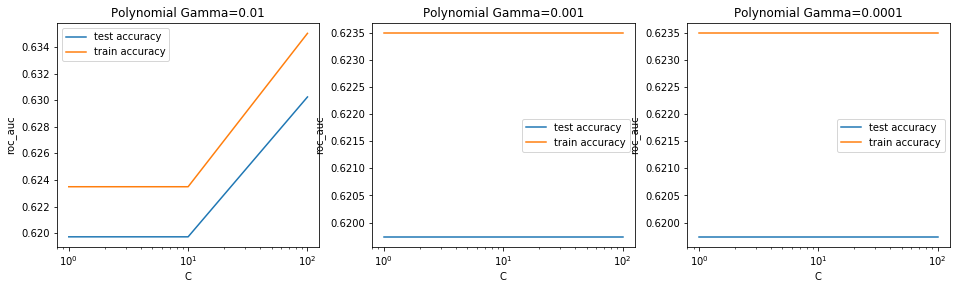

In [135]:
# Polynomial 

plt.figure(figsize=(16,14))

plt.subplot(331) 
gamma_01 = cv_results_poly[cv_results_poly['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.title("Polynomial Gamma=0.01")
plt.legend(['test accuracy', 'train accuracy'])
plt.xscale('log')



plt.subplot(332)
gamma_001 = cv_results_poly[cv_results_poly['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.title("Polynomial Gamma=0.001")
plt.legend(['test accuracy', 'train accuracy'])
plt.xscale('log')


plt.subplot(333)
gamma_0001 = cv_results_poly[cv_results_poly['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.title("Polynomial Gamma=0.0001")
plt.legend(['test accuracy', 'train accuracy'])
plt.xscale('log')
plt.show()

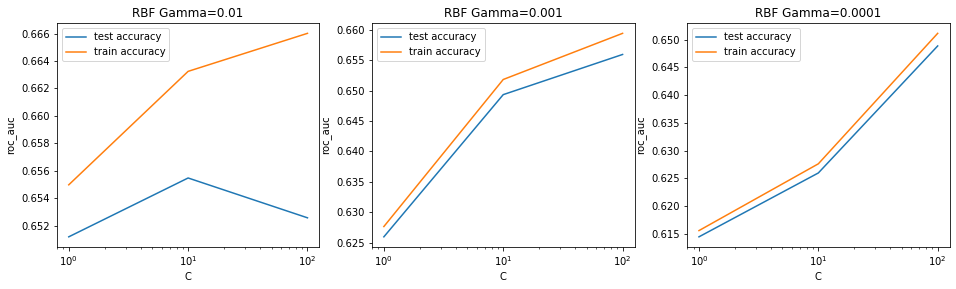

In [136]:
# RBF 

plt.figure(figsize=(16,14))

plt.subplot(331) 
gamma_01 = cv_results_rbf[cv_results_rbf['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.title("RBF Gamma=0.01")
plt.legend(['test accuracy', 'train accuracy'])
plt.xscale('log')



plt.subplot(332)
gamma_001 = cv_results_rbf[cv_results_rbf['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.title("RBF Gamma=0.001")
plt.legend(['test accuracy', 'train accuracy'])
plt.xscale('log')


plt.subplot(333)
gamma_0001 = cv_results_rbf[cv_results_rbf['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.title("RBF Gamma=0.0001")
plt.legend(['test accuracy', 'train accuracy'])
plt.xscale('log')
plt.show()

In [137]:
# optimal hyperparameters
best_C = 10
best_gamma = 0.001

# model
svm_final = svm.SVC(kernel='rbf', C=best_C, gamma=best_gamma,class_weight='balanced')
svm_final.probability=True

# fit
svm_final.fit(X_train[col], y_train)


SVC(C=10, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

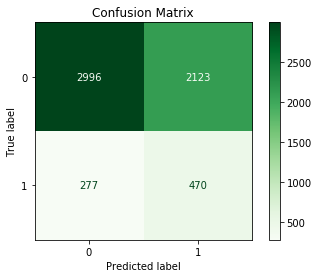

In [138]:
# Plot confusion matrix for train data

disp = metrics.plot_confusion_matrix(svm_final, X_train[col], y_train, display_labels=None,
                                 cmap=plt.cm.Greens, values_format='g')
disp.ax_.set_title("Confusion Matrix")
plt.show()

In [139]:
y_train_pred_svm = svm_final.predict(X_train[col])
y_train_pred_prob_svm = svm_final.predict_proba(X_train[col])

print(classification_report(y_train,y_train_pred_svm))

              precision    recall  f1-score   support

           0       0.92      0.59      0.71      5119
           1       0.18      0.63      0.28       747

    accuracy                           0.59      5866
   macro avg       0.55      0.61      0.50      5866
weighted avg       0.82      0.59      0.66      5866



In [140]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]

# Creating a dataframe with the actual default and the predicted probabilities

y_train_pred_svm_final = pd.DataFrame({'Default':y_train, 'Default_Prob':y_train_pred_prob_svm[:,1]})
y_train_pred_svm_final['CustID'] = y_train.index

for i in numbers:
    y_train_pred_svm_final[i]= y_train_pred_svm_final.Default_Prob.map(lambda x: 1 if x > i else 0)

    
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df_svm = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_svm_final.Default, y_train_pred_svm_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df_svm.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df_svm)

     prob  accuracy     sensi     speci
0.0   0.0  0.127344  1.000000  0.000000
0.1   0.1  0.453802  0.793842  0.404181
0.2   0.2  0.816570  0.259705  0.897832
0.3   0.3  0.868224  0.036145  0.989646
0.4   0.4  0.872656  0.002677  0.999609
0.5   0.5  0.872656  0.000000  1.000000
0.6   0.6  0.872656  0.000000  1.000000
0.7   0.7  0.872656  0.000000  1.000000
0.8   0.8  0.872656  0.000000  1.000000
0.9   0.9  0.872656  0.000000  1.000000


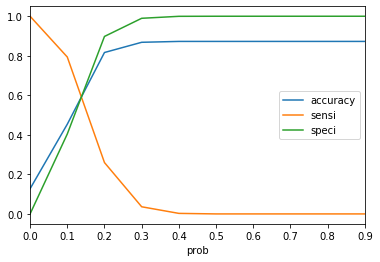

In [141]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df_svm.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [142]:
y_train_pred_svm_final['final_predicted'] = y_train_pred_svm_final.Default_Prob.map( lambda x: 1 if x > 0.2 else 0)

confusion_svm = metrics.confusion_matrix(y_train_pred_svm_final.Default, y_train_pred_svm_final.final_predicted )
TP = confusion_svm[1,1] # true positive 
TN = confusion_svm[0,0] # true negatives
FP = confusion_svm[0,1] # false positives
FN = confusion_svm[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity: {:2.2f}%".format((TP / float(TP+FN))*100))

# Let us calculate specificity
print("Specifity: {:2.2f}%".format((TN / float(TN+FP))*100))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Postive Rate: {:2.2f}%".format((FP/ float(TN+FP))*100))

# positive predictive value 
print ("Positive Predicitve Value: {:2.2f}%".format((TP / float(TP+FP))*100))

# Negative predictive value
print("Negative Predictive Value: {:2.2f}%".format((TN / float(TN+ FN))*100))

Sensitivity: 25.97%
Specifity: 89.78%
False Postive Rate: 10.22%
Positive Predicitve Value: 27.06%
Negative Predictive Value: 89.26%


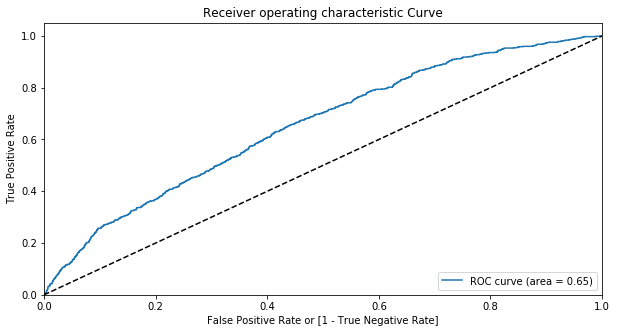

In [143]:
draw_roc(y_train_pred_svm_final.Default, y_train_pred_svm_final.Default_Prob)

In [144]:
# Making prediction on test data set

y_test_pred_svm = svm_final.predict(X_test[col])
y_test_pred_prob_svm = svm_final.predict_proba(X_test[col])

print("Model Accuracy: {:0.2f}%".format(metrics.accuracy_score(y_test, y_test_pred_svm)*100))
print("Model ROC AUC: {:0.2f}%".format(metrics.roc_auc_score(y_test, y_test_pred_prob_svm[:,1])*100))

Model Accuracy: 59.51%
Model ROC AUC: 64.74%


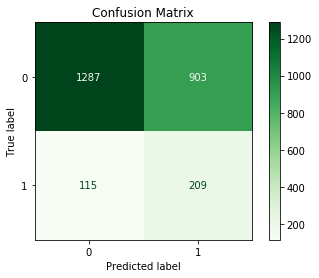

In [145]:
# Plot confusion matrix for test data

disp = metrics.plot_confusion_matrix(svm_final, X_test[col], y_test, display_labels=None,
                                 cmap=plt.cm.Greens, values_format='g')
disp.ax_.set_title("Confusion Matrix")
plt.show()

In [146]:
# Confusion Matrix for test data
confusion = metrics.confusion_matrix(y_test, y_test_pred_svm)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity/Recall: {:2.2f}%".format((TP / float(TP+FN))*100))

# Let us calculate specificity
print("Specifity: {:2.2f}%".format((TN / float(TN+FP))*100))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Postive Rate: {:2.2f}%".format((FP/ float(TN+FP))*100))

# positive predictive value 
print ("Positive Predicitve Value/Precision: {:2.2f}%".format((TP / float(TP+FP))*100))

# Negative predictive value
print("Negative Predictive Value: {:2.2f}%".format((TN / float(TN+ FN))*100))

# F1 Score
print("Model F1 Score: {:0.2f}%".format(metrics.f1_score(y_test, y_test_pred)*100))

Sensitivity/Recall: 64.51%
Specifity: 58.77%
False Postive Rate: 41.23%
Positive Predicitve Value/Precision: 18.79%
Negative Predictive Value: 91.80%
Model F1 Score: 29.20%


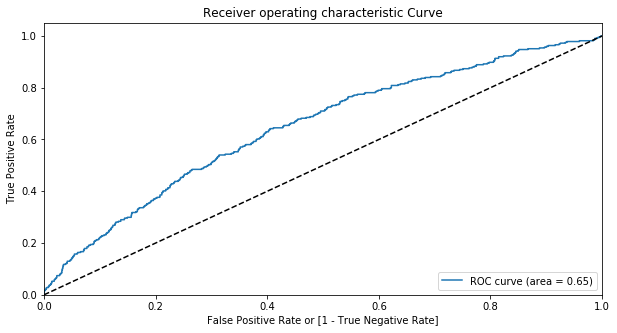

In [147]:
draw_roc(y_test, y_test_pred_prob_svm[:, 1])